In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 172.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp310-cp310-linux_x86_64.whl size=302971 sha256=f23a484efb894e3089a83d2d54bd55d84f4a90f73d41ed3e01665a9c016621dc
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8d/c2/af/d591c26196f80ecdedb79664b51642ff1cf49af64d5cd69999
Successfully built peewee


In [2]:
# 1. Install and import libraries
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 21.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 158.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 173.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 168.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 141.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 149.1 MB/s eta 0:00:00


2025-05-03 23:29:04.000374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746314944.027197   11705 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746314944.034115   11705 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746314944.054632   11705 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746314944.054665   11705 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746314944.054667   11705 computation_placer.cc:177] computation placer alr

In [3]:
# 2. Exploratory Analysis
import yfinance as yfin

tickers = ('VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY')

start = "2004-01-01"
end = '2024-12-31'

fin_data = yfin.download(tickers, start, end) # downloading yahoo finance data for a specific date

fin_data.to_csv('./data/fin_data.csv')




YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed


In [4]:
# check the dimension of the dataset
fin_data.shape



(5284, 40)

In [5]:
# check the first 5 rows
fin_data.head()

Price          Close                                                        \
Ticker          AAPL    AMZN       MSFT      NVDA        SPY TSLA UPRO VOO   
Date                                                                         
2004-01-02  0.320196  2.5950  17.006971  0.176370  74.680298  NaN  NaN NaN   
2004-01-05  0.333588  2.6635  17.434473  0.182101  75.492683  NaN  NaN NaN   
2004-01-06  0.332384  2.6515  17.496428  0.189514  75.566528  NaN  NaN NaN   
2004-01-07  0.339907  2.5950  17.477840  0.191195  75.821655  NaN  NaN NaN   
2004-01-08  0.351493  2.5120  17.446863  0.191882  76.123795  NaN  NaN NaN   

Price           High          ... Open         Volume                       \
Ticker          AAPL    AMZN  ... UPRO VOO       AAPL       AMZN      MSFT   
Date                          ...                                            
2004-01-02  0.327268  2.6565  ...  NaN NaN  144642400  132798000  44487700   
2004-01-05  0.336897  2.6800  ...  NaN NaN  395018400  225682000  67333700   
2004-01-06  0.337349  2.6750  ...  NaN NaN  509348000  119710000  46950800   
2004-01-07  0.343519  2.6330  ...  NaN NaN  586874400  184854000  54298200   
2004-01-08  0.357060  2.6050  ...  NaN NaN  460303200  206406000  58810800   

Price                                           
Ticker            NVDA       SPY TSLA UPRO VOO  
Date                                            
2004-01-02   436416000  38072300  NaN  NaN NaN  
2004-01-05   575292000  27959800  NaN  NaN NaN  
2004-01-06  1093344000  20472800  NaN  NaN NaN  
2004-01-07   673032000  30170400  NaN  NaN NaN  
2004-01-08   433752000  36438400  NaN  NaN NaN  

[5 rows x 40 columns]

In [6]:
# check the last 5 rows
fin_data.tail()

Price            Close                                                  \
Ticker            AAPL        AMZN        MSFT        NVDA         SPY   
Date                                                                     
2024-12-23  254.989655  225.059998  434.379028  139.657150  592.906433   
2024-12-24  257.916443  229.050003  438.450836  140.207108  599.496582   
2024-12-26  258.735504  227.050003  437.233276  139.917130  599.536499   
2024-12-27  255.309296  223.750000  429.668457  136.997391  593.225464   
2024-12-30  251.923019  221.300003  423.979858  137.477356  586.455811   

Price                                                High              ...  \
Ticker            TSLA       UPRO         VOO        AAPL        AMZN  ...   
Date                                                                   ...   
2024-12-23  430.600006  92.794128  545.299500  255.369227  226.880005  ...   
2024-12-24  462.279999  95.757233  550.910034  257.926411  229.139999  ...   
2024-12-26  454.130005  95.747253  550.900024  259.814335  228.500000  ...   
2024-12-27  431.660004  92.694359  545.189880  258.415896  226.029999  ...   
2024-12-30  417.410004  89.451904  539.120850  253.221595  223.000000  ...   

Price            Open                Volume                                 \
Ticker           UPRO         VOO      AAPL      AMZN      MSFT       NVDA   
Date                                                                         
2024-12-23  91.008282  541.432900  40858800  28070000  19152500  176053500   
2024-12-24  93.332872  546.166470  23234700  15007500   7164500  105157000   
2024-12-26  94.889249  549.295602  27237100  16146700   8194200  116205600   
2024-12-27  93.861641  547.471947  42355300  27367100  18117700  170582600   
2024-12-30  89.292272  538.692343  35557500  28321200  13158700  167734700   

Price                                                   
Ticker           SPY        TSLA       UPRO        VOO  
Date                                                    
2024-12-23  57635800  72698100.0  3728200.0  7063400.0  
2024-12-24  33160100  59551800.0  2349800.0  3439300.0  
2024-12-26  41219100  76366400.0  2945300.0  4492000.0  
2024-12-27  64969300  82666800.0  5207300.0  7077100.0  
2024-12-30  56578800  64941000.0  5261800.0  6505100.0  

[5 rows x 40 columns]

In [7]:
# Check if any stock has any missing values
fin_data.isnull().sum()

Price   Ticker
Close   AAPL         0
        AMZN         0
        MSFT         0
        NVDA         0
        SPY          0
        TSLA      1633
        UPRO      1379
        VOO       1683
High    AAPL         0
        AMZN         0
        MSFT         0
        NVDA         0
        SPY          0
        TSLA      1633
        UPRO      1379
        VOO       1683
Low     AAPL         0
        AMZN         0
        MSFT         0
        NVDA         0
        SPY          0
        TSLA      1633
        UPRO      1379
        VOO       1683
Open    AAPL         0
        AMZN         0
        MSFT         0
        NVDA         0
        SPY          0
        TSLA      1633
        UPRO      1379
        VOO       1683
Volume  AAPL         0
        AMZN         0
        MSFT         0
        NVDA         0
        SPY          0
        TSLA      1633
        UPRO      1379
        VOO       1683
dtype: int64

In [8]:
# Handling missing values
fin_data.fillna(method='ffill', inplace=True)
fin_data.fillna(method='bfill', inplace=True)

In [9]:
# Check again to see if there's any missing values
fin_data.isnull().sum()

Price   Ticker
Close   AAPL      0
        AMZN      0
        MSFT      0
        NVDA      0
        SPY       0
        TSLA      0
        UPRO      0
        VOO       0
High    AAPL      0
        AMZN      0
        MSFT      0
        NVDA      0
        SPY       0
        TSLA      0
        UPRO      0
        VOO       0
Low     AAPL      0
        AMZN      0
        MSFT      0
        NVDA      0
        SPY       0
        TSLA      0
        UPRO      0
        VOO       0
Open    AAPL      0
        AMZN      0
        MSFT      0
        NVDA      0
        SPY       0
        TSLA      0
        UPRO      0
        VOO       0
Volume  AAPL      0
        AMZN      0
        MSFT      0
        NVDA      0
        SPY       0
        TSLA      0
        UPRO      0
        VOO       0
dtype: int64

In [10]:
# Descriptive statistics of Price Close

fin_data[['Close']].describe()

Price         Close                                                      \
Ticker         AAPL         AMZN         MSFT         NVDA          SPY   
count   5284.000000  5284.000000  5284.000000  5284.000000  5284.000000   
mean      48.971147    51.806053    97.803589    10.055661   201.639068   
std       62.634552    60.199070   116.842128    24.464542   133.914290   
min        0.320196     1.303500    11.198264     0.072061    50.379543   
25%        5.191071     4.214125    20.163290     0.322592    93.518602   
50%       20.843679    16.637000    35.295105     0.535473   159.661957   
75%       54.196305    92.490747   132.044636     6.152183   267.910744   
max      258.735504   232.929993   464.854340   148.856064   603.954346   

Price                                          
Ticker         TSLA         UPRO          VOO  
count   5284.000000  5284.000000  5284.000000  
mean      56.760859    17.109464   184.344082  
std       96.674625    21.027578   123.189301  
min        1.053333     0.993745    77.452820  
25%        1.592667     1.143843    77.452820  
50%       13.083333     8.183502   146.168579  
75%       23.800834    25.748522   245.418457  
max      479.859985    98.972450   555.112488

In [11]:
# General info
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2004-01-02 to 2024-12-30
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   5284 non-null   float64
 1   (Close, AMZN)   5284 non-null   float64
 2   (Close, MSFT)   5284 non-null   float64
 3   (Close, NVDA)   5284 non-null   float64
 4   (Close, SPY)    5284 non-null   float64
 5   (Close, TSLA)   5284 non-null   float64
 6   (Close, UPRO)   5284 non-null   float64
 7   (Close, VOO)    5284 non-null   float64
 8   (High, AAPL)    5284 non-null   float64
 9   (High, AMZN)    5284 non-null   float64
 10  (High, MSFT)    5284 non-null   float64
 11  (High, NVDA)    5284 non-null   float64
 12  (High, SPY)     5284 non-null   float64
 13  (High, TSLA)    5284 non-null   float64
 14  (High, UPRO)    5284 non-null   float64
 15  (High, VOO)     5284 non-null   float64
 16  (Low, AAPL)     5284 non-null   float64
 17  (Low, AMZN)    

In [12]:
# Returning the max stock value
def max_close(stocks, df):
    """ This function calculates the max closing value of specific stock"""
    return df['Close'][stocks].max()

In [13]:
# Testing the max function
def test_max():
    for stocks in ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']:
        print(f"Maximum closing value of {stocks} is {max_close(stocks, fin_data)}")
test_max()

Maximum closing value of VOO is 555.1124877929688
Maximum closing value of AAPL is 258.7355041503906
Maximum closing value of MSFT is 464.8543395996094
Maximum closing value of AMZN is 232.92999267578125
Maximum closing value of UPRO is 98.97245025634766
Maximum closing value of NVDA is 148.85606384277344
Maximum closing value of TSLA is 479.8599853515625
Maximum closing value of SPY is 603.954345703125


In [14]:
# calculate the mean volume for the stocks 
def mean_volume(stocks, df):
    return df['Volume'][stocks].mean() # computes and returns the mean value of stock

In [15]:
def test_mean():
    for stocks in ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']:
        print(f"Mean value of {stocks} is {mean_volume(stocks, fin_data)}")
test_mean()

Mean value of VOO is 1893547.7952308857
Mean value of AAPL is 390577442.08932626
Mean value of MSFT is 45346101.003028005
Mean value of AMZN is 108082068.48978047
Mean value of UPRO is 21634681.945495836
Mean value of NVDA is 550219260.5980318
Mean value of TSLA is 153796661.48750946
Mean value of SPY is 121691161.86601059


In [16]:
# Plot function for closing value
def plot_close(df, title, stocks, y=0):
    ax = df['Close'][stocks].plot(title=title, figsize=(24,8), ax=None)
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

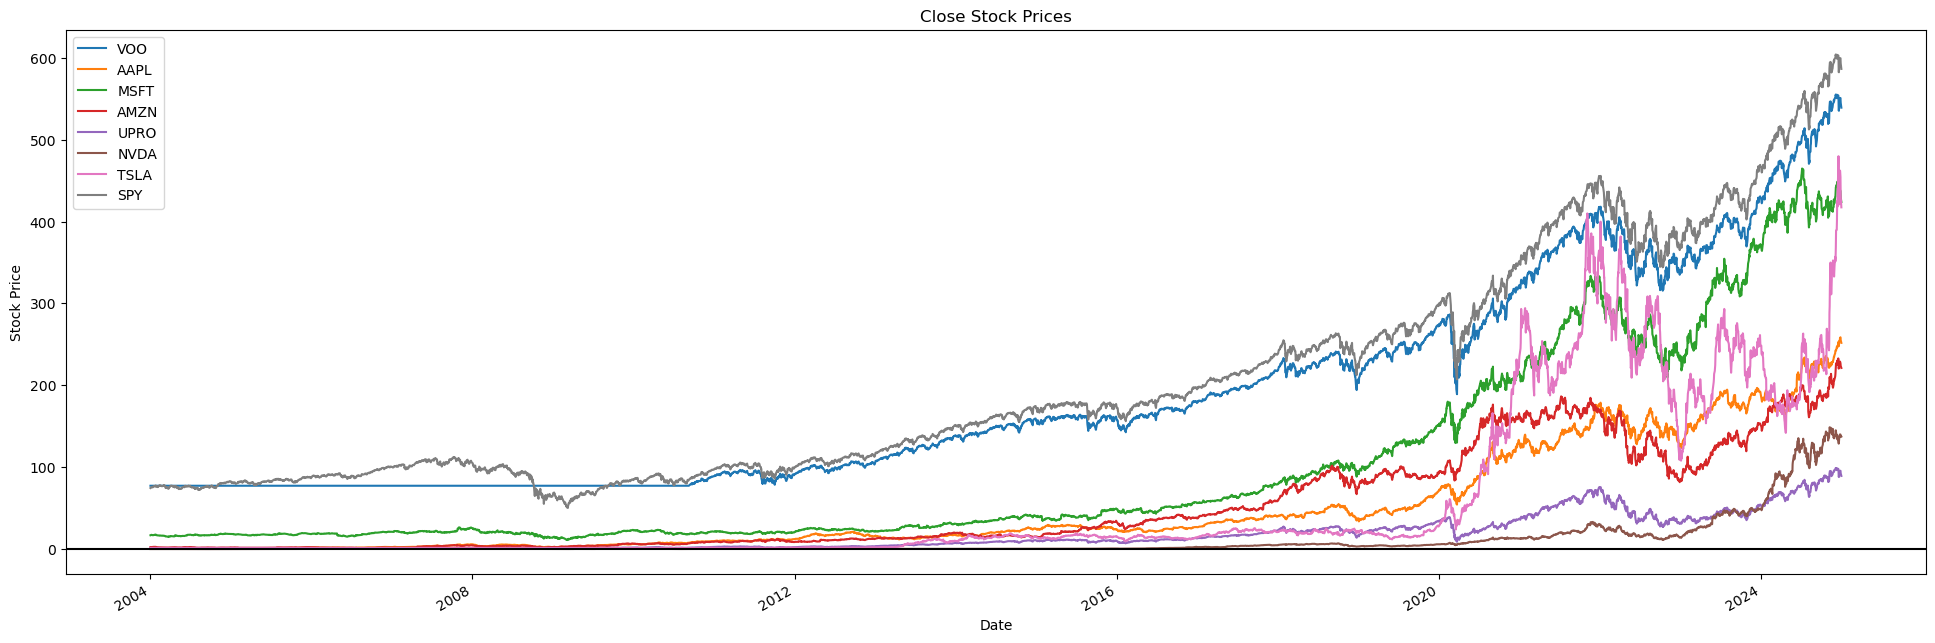

In [17]:
# View the plot of Close Price
stocks = ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']
plot_close(fin_data, "Close Stock Prices", stocks)

In [18]:
# Plot function for High Prices
def plot_high(df, title, stocks, y=0):
    ax = df['High'][stocks].plot(title=title, figsize=(20,8), ax=None)
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

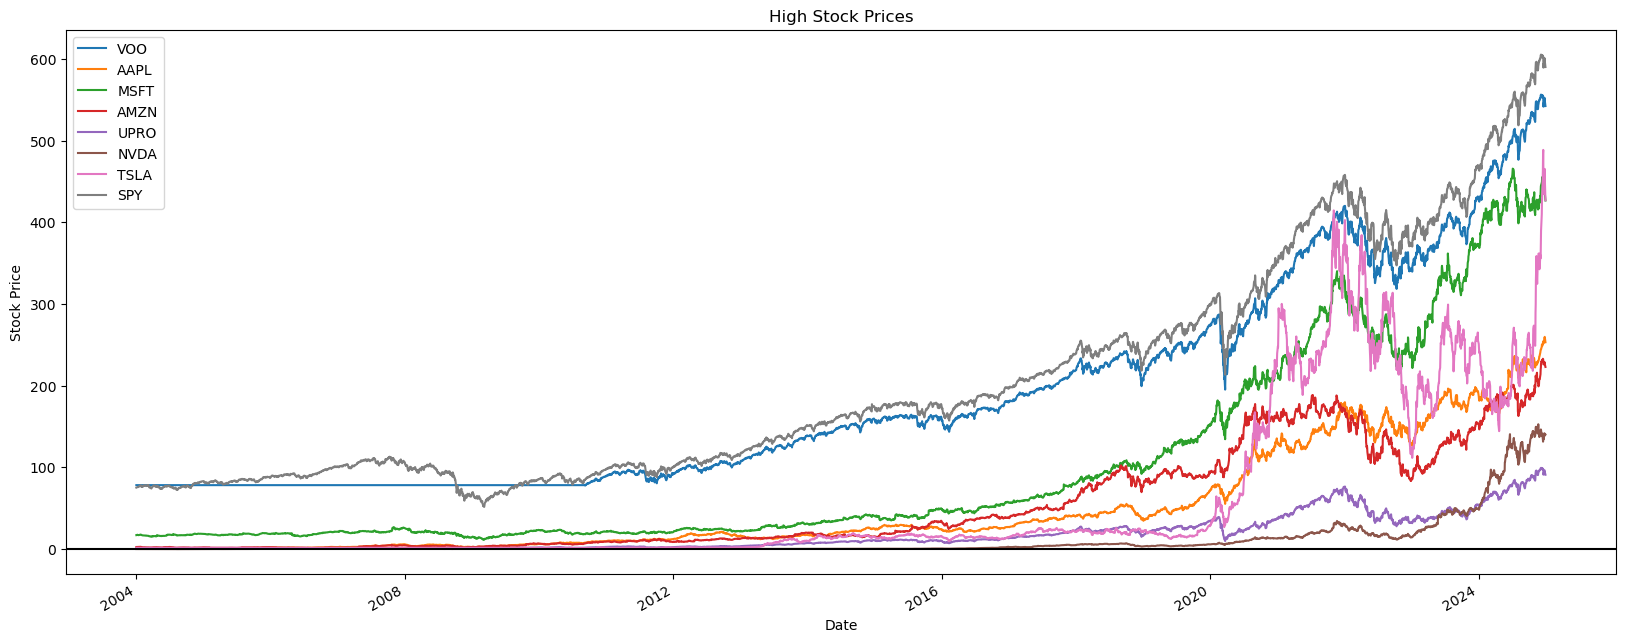

In [19]:
# View the plot of Close Price
stocks = ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']
plot_high(fin_data, "High Stock Prices", stocks)

In [20]:
# View the Close and High for VOO stock
fin_data.loc[:, [('Close', 'VOO'), ('High', 'VOO')]]

Price            Close        High
Ticker             VOO         VOO
Date                              
2004-01-02   77.452820   78.354856
2004-01-05   77.452820   78.354856
2004-01-06   77.452820   78.354856
2004-01-07   77.452820   78.354856
2004-01-08   77.452820   78.354856
...                ...         ...
2024-12-23  545.299500  545.468895
2024-12-24  550.910034  550.989775
2024-12-26  550.900024  552.055990
2024-12-27  545.189880  547.721083
2024-12-30  539.120850  542.210175

[5284 rows x 2 columns]

In [21]:
# View VOO and SPY closing price
fin_data['Close'][['VOO','SPY']]

Ticker             VOO         SPY
Date                              
2004-01-02   77.452820   74.680298
2004-01-05   77.452820   75.492683
2004-01-06   77.452820   75.566528
2004-01-07   77.452820   75.821655
2004-01-08   77.452820   76.123795
...                ...         ...
2024-12-23  545.299500  592.906433
2024-12-24  550.910034  599.496582
2024-12-26  550.900024  599.536499
2024-12-27  545.189880  593.225464
2024-12-30  539.120850  586.455811

[5284 rows x 2 columns]

In [22]:
# View Closing Price for SPY and VOO from Jan 2007 to December 2021
fin_data['Close'].loc['2007-01-01':'2021-12-31', ['SPY','VOO']]

Ticker             SPY         VOO
Date                              
2007-01-03  100.260498   77.452820
2007-01-04  100.473267   77.452820
2007-01-05   99.671844   77.452820
2007-01-08  100.132858   77.452820
2007-01-09  100.047745   77.452820
...                ...         ...
2021-12-27  455.381012  417.784058
2021-12-28  455.008881  417.469940
2021-12-29  455.591003  417.974518
2021-12-30  454.331421  416.793884
2021-12-31  453.186523  415.651398

[3777 rows x 2 columns]

In [23]:
# View all Closing Prices from Jan 2007 to December 2024
fin_data['Close'].loc['2007-01-01':'2024-12-31']

Ticker            AAPL        AMZN        MSFT        NVDA         SPY  \
Date                                                                     
2007-01-03    2.521843    1.935000   21.235306    0.551423  100.260498   
2007-01-04    2.577818    1.945000   21.199745    0.548825  100.473267   
2007-01-05    2.559460    1.918500   21.078842    0.514437   99.671844   
2007-01-08    2.572100    1.875000   21.285080    0.518259  100.132858   
2007-01-09    2.785764    1.889000   21.306414    0.508171  100.047745   
...                ...         ...         ...         ...         ...   
2024-12-23  254.989655  225.059998  434.379028  139.657150  592.906433   
2024-12-24  257.916443  229.050003  438.450836  140.207108  599.496582   
2024-12-26  258.735504  227.050003  437.233276  139.917130  599.536499   
2024-12-27  255.309296  223.750000  429.668457  136.997391  593.225464   
2024-12-30  251.923019  221.300003  423.979858  137.477356  586.455811   

Ticker            TSLA       UPRO         VOO  
Date                                           
2007-01-03    1.592667   1.143843   77.452820  
2007-01-04    1.592667   1.143843   77.452820  
2007-01-05    1.592667   1.143843   77.452820  
2007-01-08    1.592667   1.143843   77.452820  
2007-01-09    1.592667   1.143843   77.452820  
...                ...        ...         ...  
2024-12-23  430.600006  92.794128  545.299500  
2024-12-24  462.279999  95.757233  550.910034  
2024-12-26  454.130005  95.747253  550.900024  
2024-12-27  431.660004  92.694359  545.189880  
2024-12-30  417.410004  89.451904  539.120850  

[4529 rows x 8 columns]

In [24]:
# create function to plot selected stocks
def plot_data1(df,stocks,title,ylabel='Stock Price',y=0):
    """This funtion plots stock prices"""
    ax = df.plot(title=title, figsize=(16,8), ax=None, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_label(ylabel)
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()


def selected_plot(df, columns,stocks, start_idx, end_idx):
    """This function plots specific stocks over a given date range"""
    plot_data1(df[columns].loc[start_idx:end_idx, stocks],stocks, title="Plot for selected Stocks")

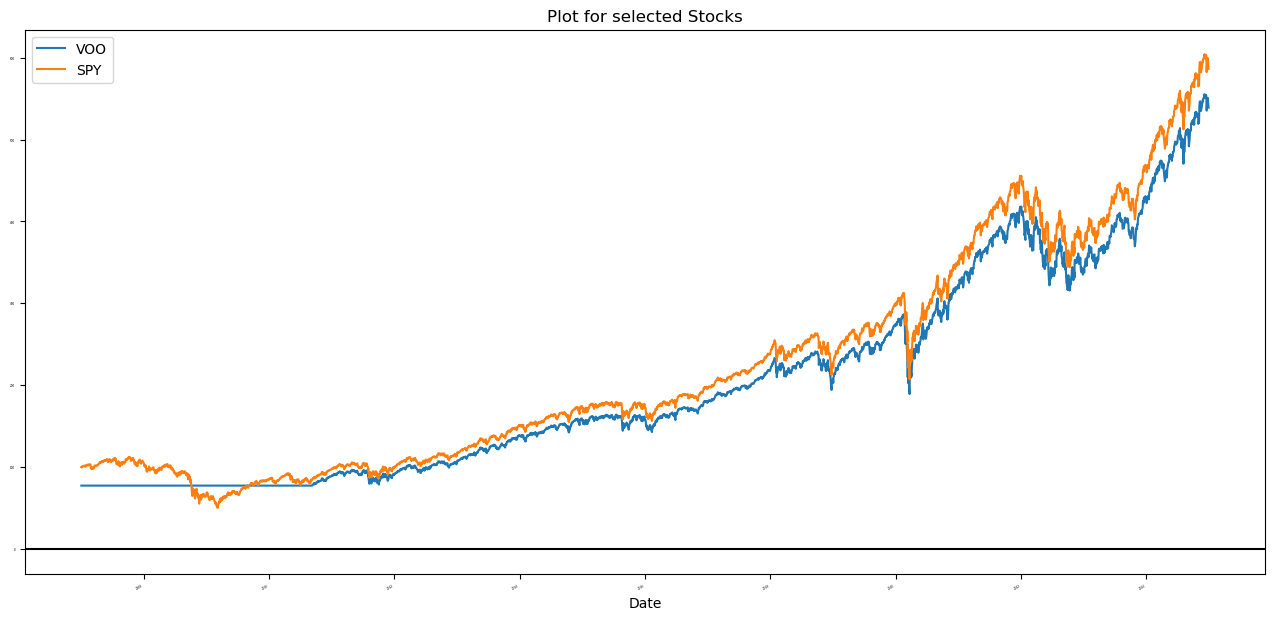

In [25]:
# create function to plot data based on specific columns, symbols, and date ranges
def test_select():
    """This function plots stock data based on specific columns, symbols, and date ranges"""
    # specify columns to plot and stock symbols
    columns = 'Close'
    stocks = ['VOO', 'SPY']
    # Get stock data
    df = fin_data

    # Slice and plot
    selected_plot(df, columns, stocks, '2007-01-01', '2024-12-31')
test_select()  # run the plot function

### Normalizing the data
We want to know how the different types of stocks went up and down with respect to the others. In order to do this, we will normalize the data. We do this by dividing the values of each column by day one to ensure that each stock starts with **$1**
.

In [26]:
def plot_data2(df,stocks,title='Stock Prices',ylabel="Stock Price",y=0, start='2001-01-01', end ='2021-08-17'):
    
    """ This function creates a plot of adjusted close stock prices
    inputs:
    df - dataframe
    title - plot title
    stocks - the stock symbols of each company
    ylabel - y axis label
    y - horizontal line(integer)
    output: the plot of adjusted close stock prices
    """
    df_new = df[start:end]
    ax = df_new.plot(title=title, figsize=(16,8), ax = None)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

In [27]:
# create function that normalizes the data
def normalize_data(df):
    """ 
    This function normalizes the stock prices using the first row of the dataframe
    input - stock data
    output - normalized stock data
    """
    return df/df.iloc[0,:]


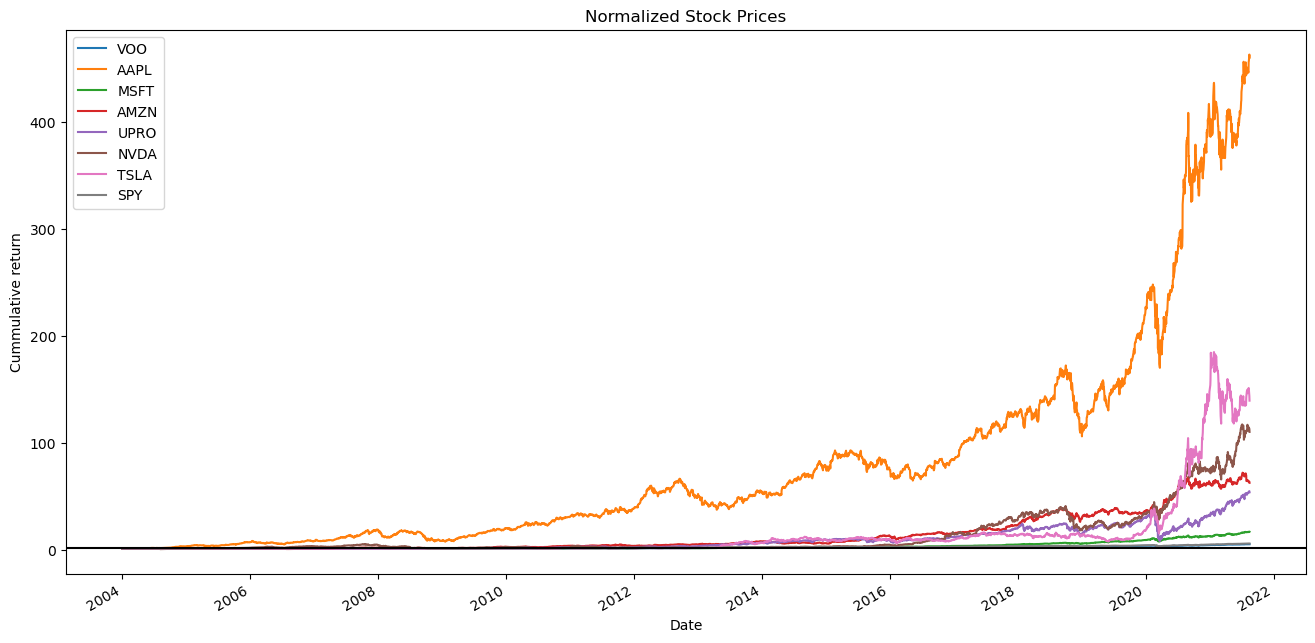

In [28]:
# plotting the data with the new normalized data

stocks = ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']

plot_data2(normalize_data(fin_data['Close'][stocks]),stocks,title = "Normalized Stock Prices", ylabel = 'Cummulative return',y=1)


From the above cummulative return plot, we can see that Apple has the highest return over the years, while Tesla was second and NVDIA third and Amazon fourth. The growth of UPRO and Microsoft looks much more stable than Apple and Tesla. Looking at the plot, Apple and Tesla have alot of volatility and risky stocks especially in recent years.

#### Cumulative Return
Let's have a look at how the pandemic affected stock prices for these companies.

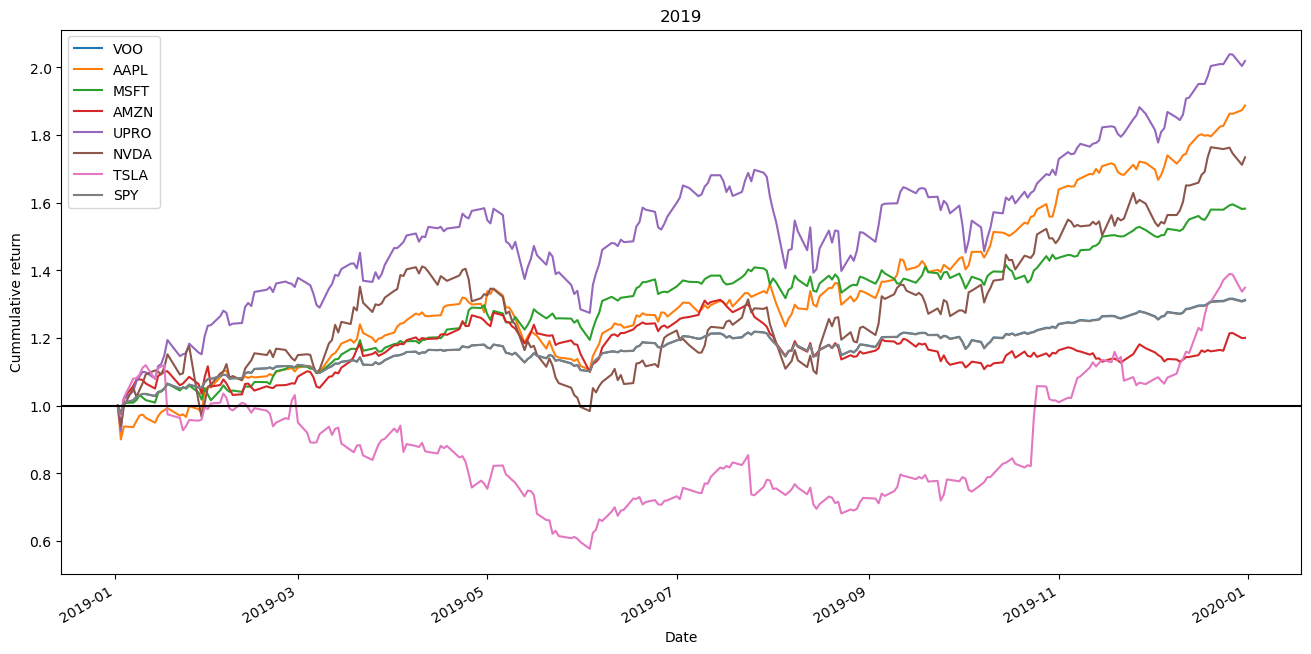

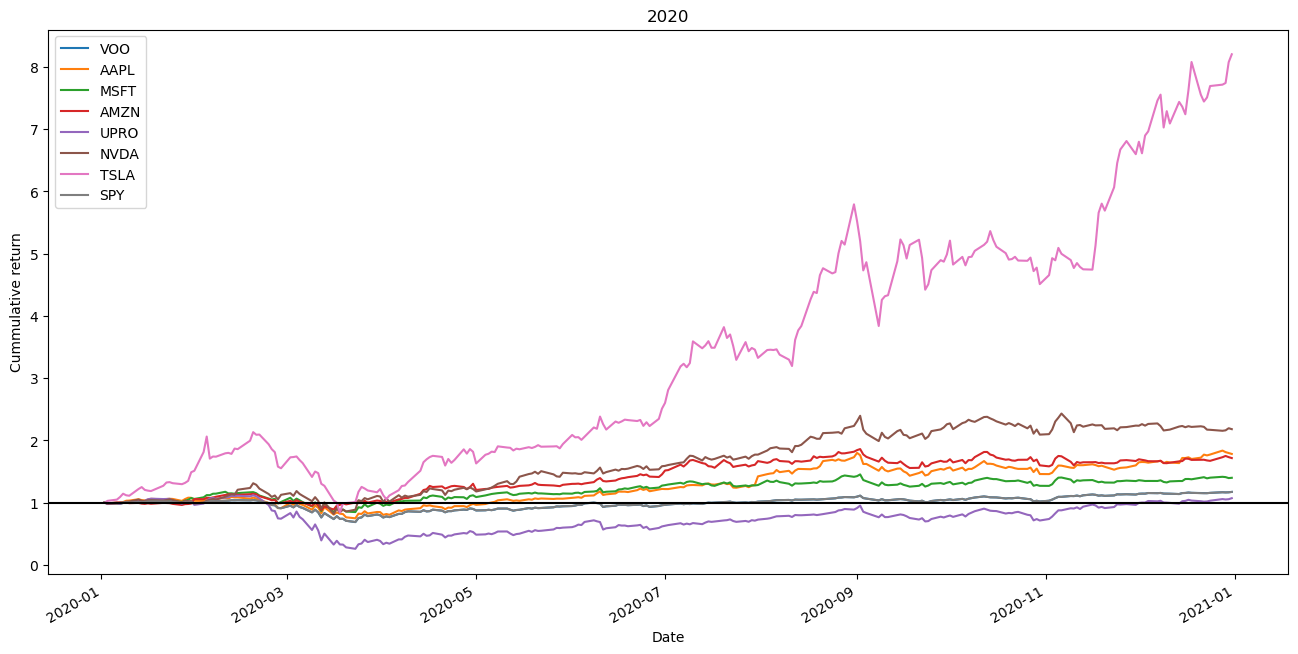

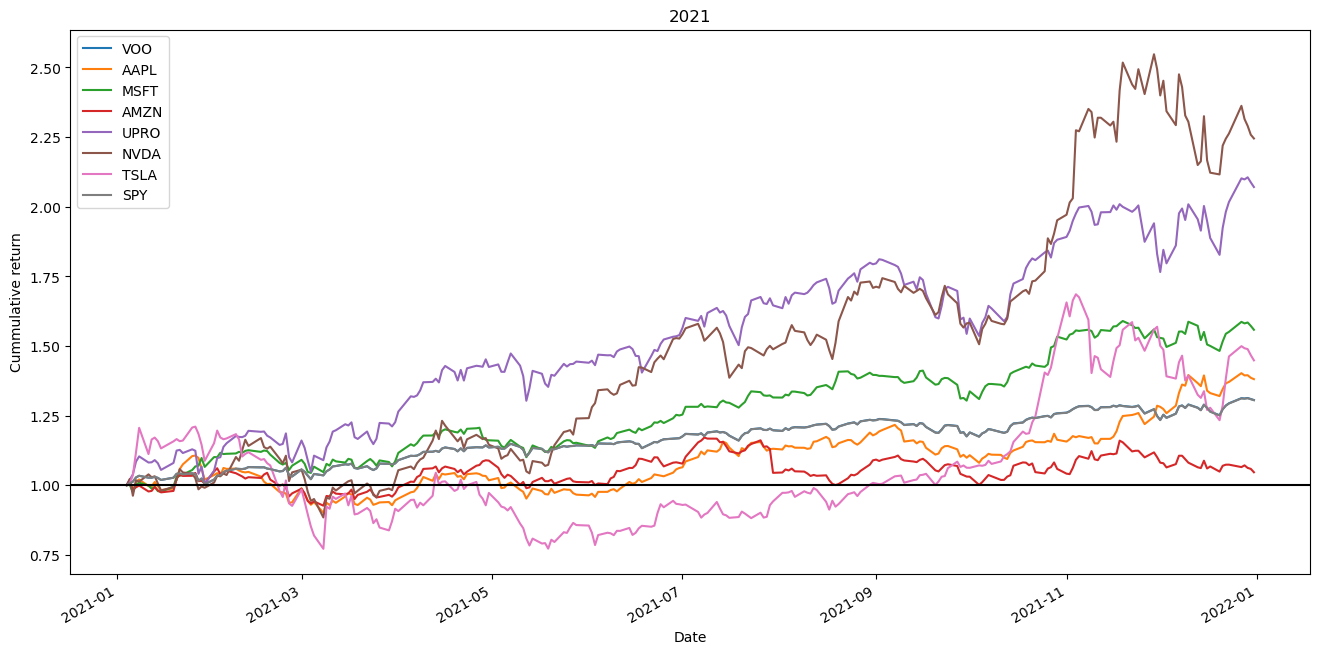

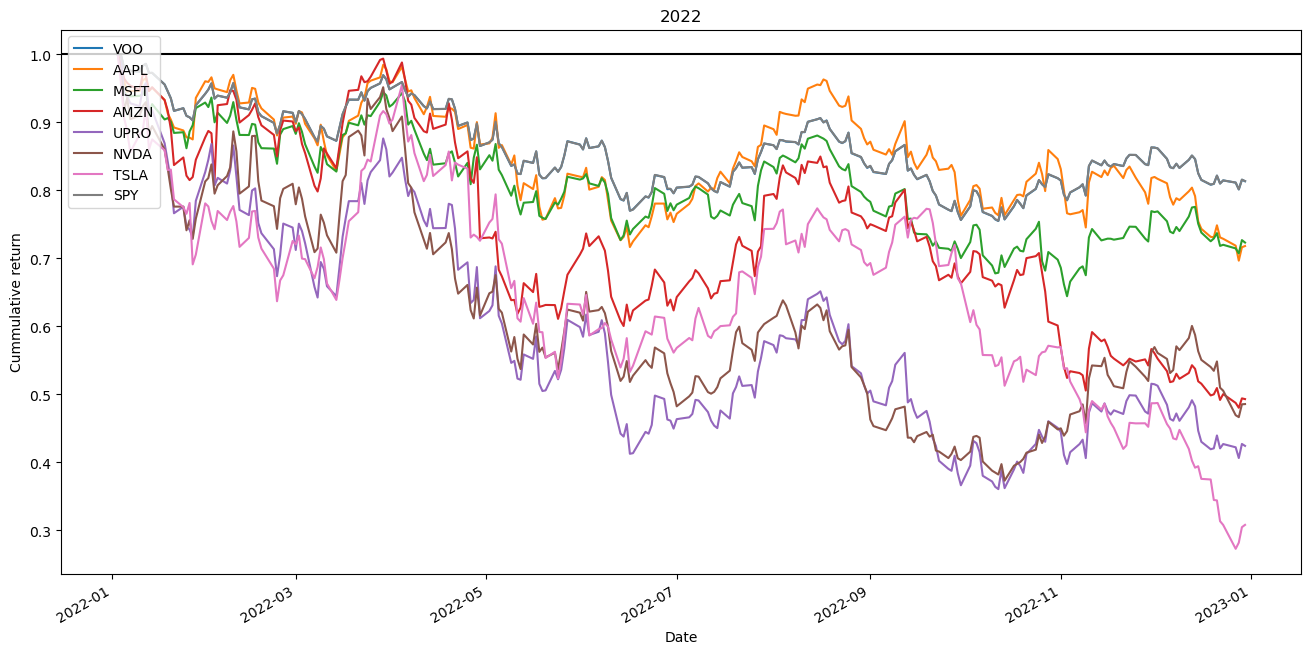

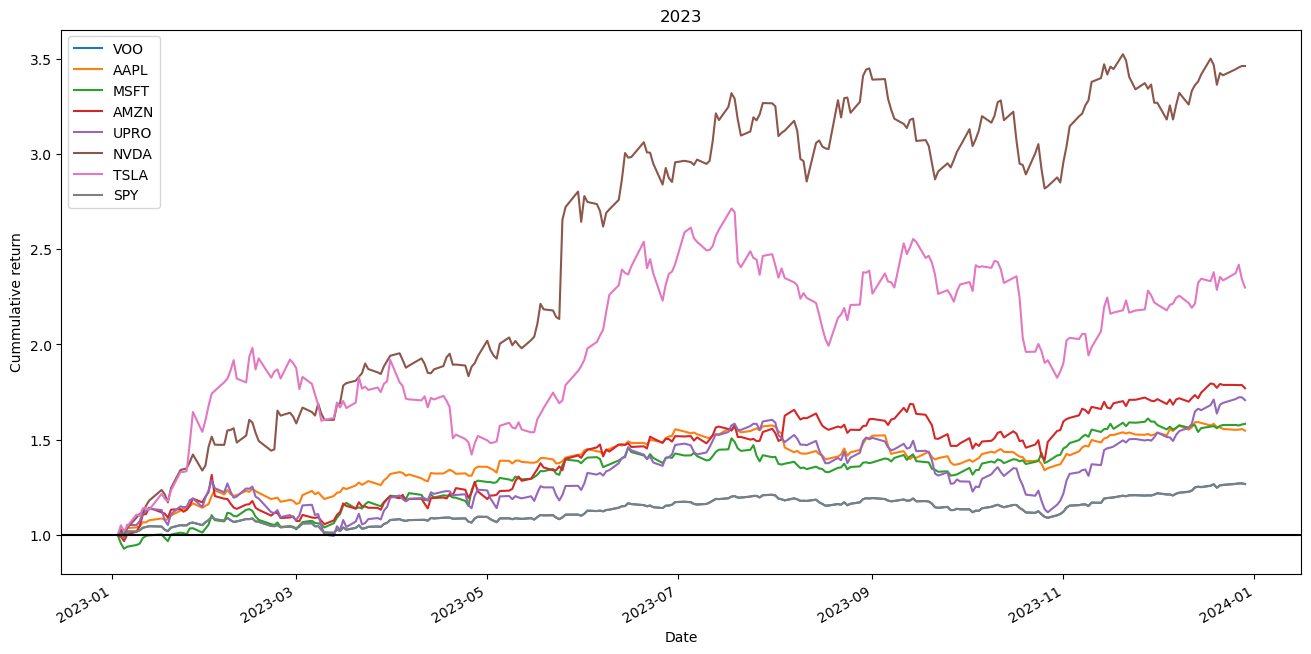

In [96]:
stocks = ['VOO', 'AAPL', 'MSFT', 'AMZN', 'UPRO', 'NVDA', 'TSLA', 'SPY']

plot_data2(normalize_data(fin_data['Close'][stocks]['2019-01-01':'2019-12-31']), stocks,title = '2019', ylabel = 'Cummulative return',y=1, start='2019-01-01', end = '2019-12-31') #2019
plot_data2(normalize_data(fin_data['Close'][stocks]['2020-01-01':'2020-12-31']), stocks,title = '2020', ylabel = 'Cummulative return',y=1, start='2020-01-01', end = '2020-12-31') #2020
plot_data2(normalize_data(fin_data['Close'][stocks]['2021-01-01':'2021-12-31']), stocks,title = '2021', ylabel = 'Cummulative return',y=1, start='2021-01-01', end = '2021-12-31') #2021
plot_data2(normalize_data(fin_data['Close'][stocks]['2022-01-01':'2022-12-31']), stocks,title = '2022', ylabel = 'Cummulative return',y=1, start='2022-01-01', end = '2022-12-31') #2022
plot_data2(normalize_data(fin_data['Close'][stocks]['2023-01-01':'2023-12-31']), stocks,title = '2023', ylabel = 'Cummulative return',y=1, start='2023-01-01', end = '2023-12-31') #2023

From the above plots, let's take note of the following:

1. 2019: Before the pandemic, we notice that most of the companies stocks were doing relatively well with Apple and UPRO taking the lead and Amazon and Tesla trailing behind.
2. 2020: On the onset of the pandemic around Spring, we notice that there was a fall in stock prices for all the companies, but afterwards the technology companies like Amazon, Apple, NVDIA, Tesla and Microsoft started to grow again. But UPRO and VOO had a steady growth. Tesla stocks took off and had the greatest return!
3. 2021: Overall there was an improvement in the stock prices of all the companies we considered.
4. 2022: Rising inflation, increased interest rates, and the Russia-Ukraine war had a negative impact on the market. Tesla was hit the hardest.
5. 2023: There was an overall improvement compared to last year. NVDIA and Tesla grew exponentially.

### Computing the Rolling mean and Bollinger Bands
The rolling mean may give us some idea about the true underlying prices of a stock. If there is a significant deviation below or above the rolling mean, it may give us an idea about a potential buying and selling opportunity respectively. The challenge remains to know when this deviation is significant enough to pay attention to it. Bollinger Bands is a statistical chart that contains the volatility of a financial instrument over time. Bollinger observed that looking at the recent volatility of the stock, if it is very volatile, we might discard the movement above and below the mean. But if it is not very volatile we may want to pay attention to it. He added a band 
 (2 standard deviations) above and below the mean. We would use the rolling standard deviation to help us achieve this.

In [29]:
# compute rolling mean, rolling standard deviation, upper and lower bands

def rolling_stats(df, stocks, type_, window = 20):
    """
    This function computes the rolling mean and Bollinger bands
    inputs : 
    df - dataframe
    stocks - the type of stocks we would be analyzing
    type_ - the price type of the rolling calculation
    window - number of days used to calculate the statistics
    output: 
    rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    val = df[(type_,stocks)]
    rolling_mean = df[(type_, stocks)].rolling(window=window).mean()
    rolling_std = df[(type_, stocks)].rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2
    
    return val, rolling_mean, rolling_std, upper_band, lower_band

In [30]:
# plot the rolling mean, rolling standard deviation, upper and lower bands

def rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean'):
    """
    This function plots the rolling mean and Bollinger bands
    inputs : 
    stocks - the type of stocks we would be analyzing
    val - value of the stock price type
    rolling_mean - rolling mean
    upper_band - stocks upper band
    lower_band - stocks lower band
    title - plot title
    output: 
    plot of rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    ax = rolling_mean.plot(title=title, figsize=(16,8), label='Rolling Mean')
    plt.plot(upper_band, label = 'Upper Band')
    plt.plot(lower_band, label = 'Lower Band')
    plt.plot(val, label = 'Value of Stock')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()
    
    return ax


/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


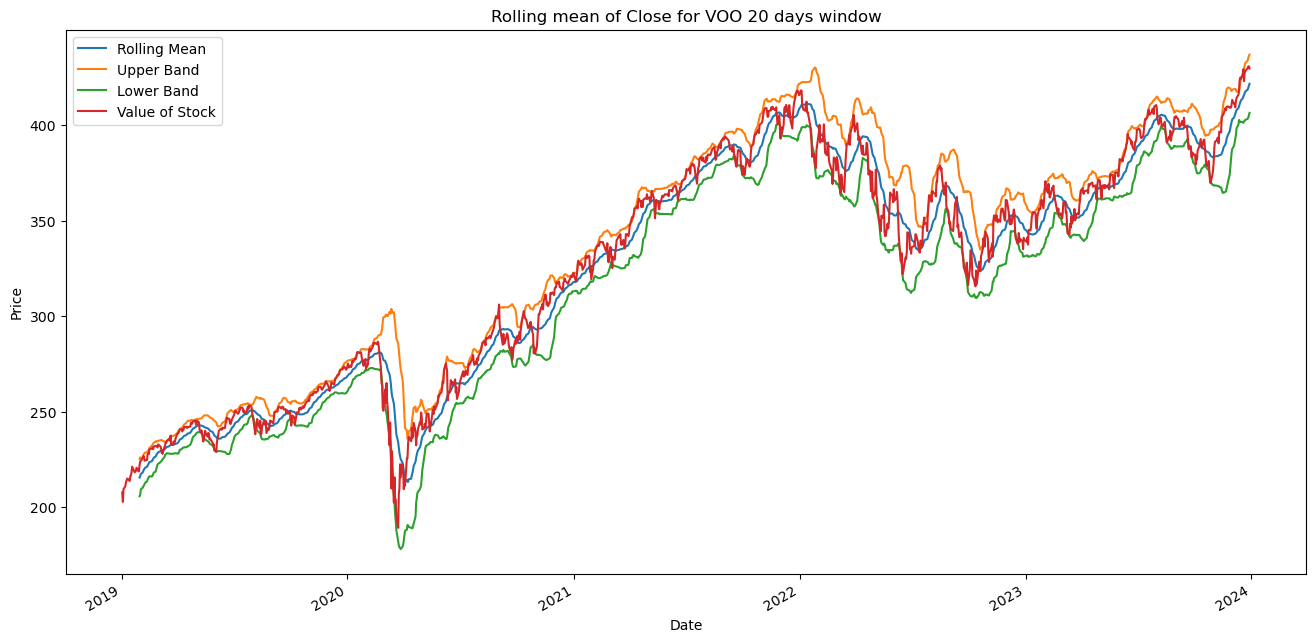

In [31]:
stocks = 'VOO'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()


/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


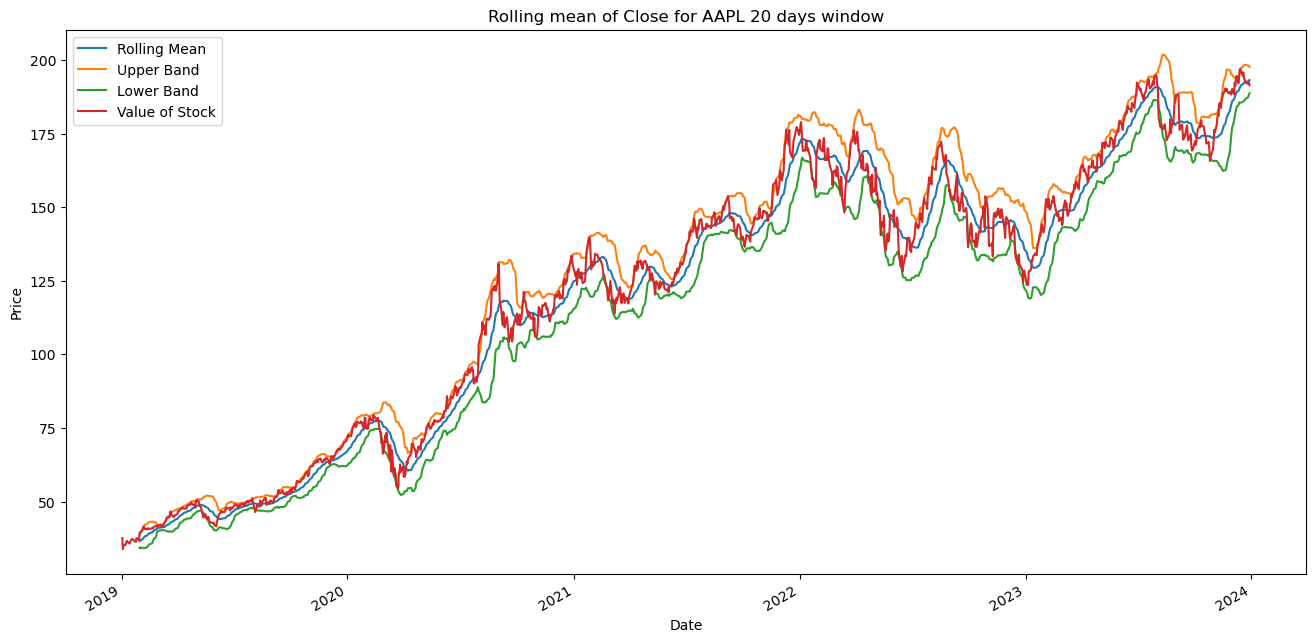

In [32]:
# view rolling statistics for Apple
stocks = 'AAPL'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()


/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


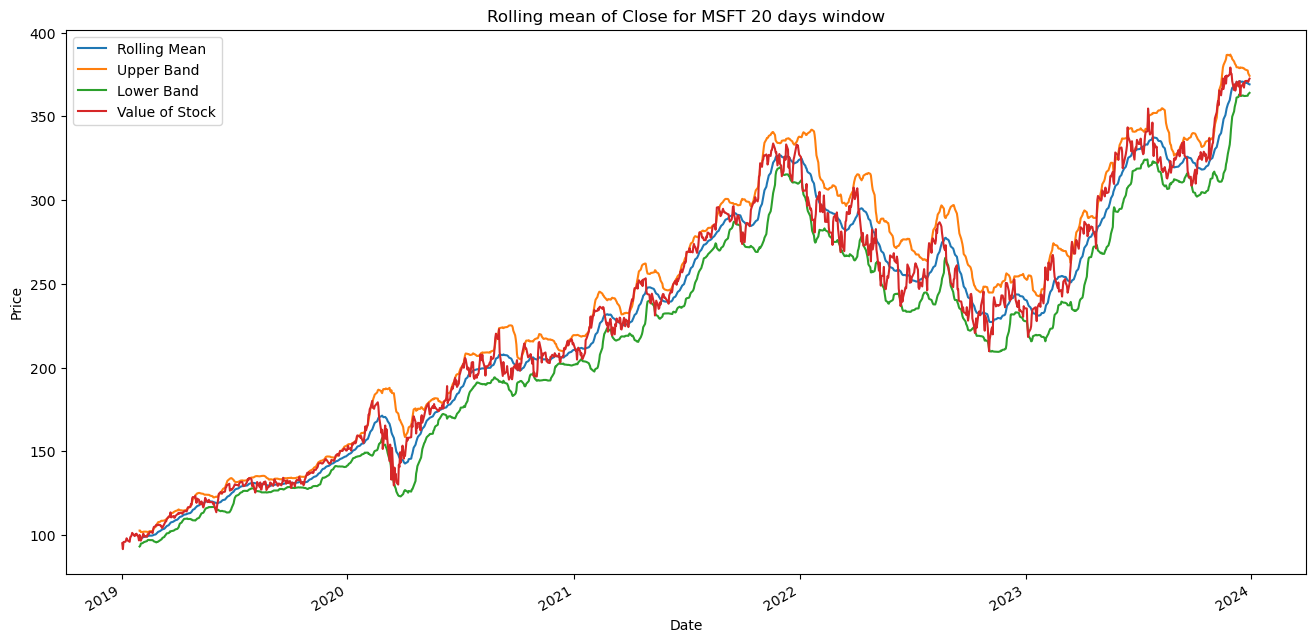

In [33]:
# view rolling statistics for Microsoft
stocks = 'MSFT'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


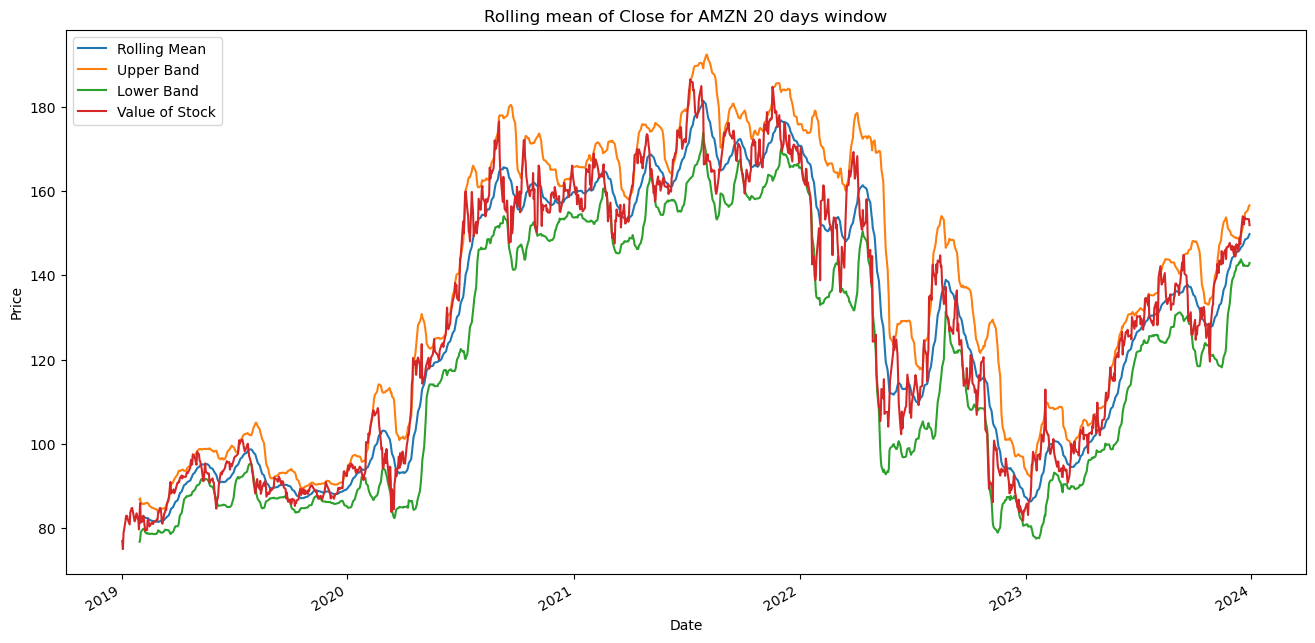

In [34]:
# view rolling statistics for Apple
stocks = 'AMZN'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


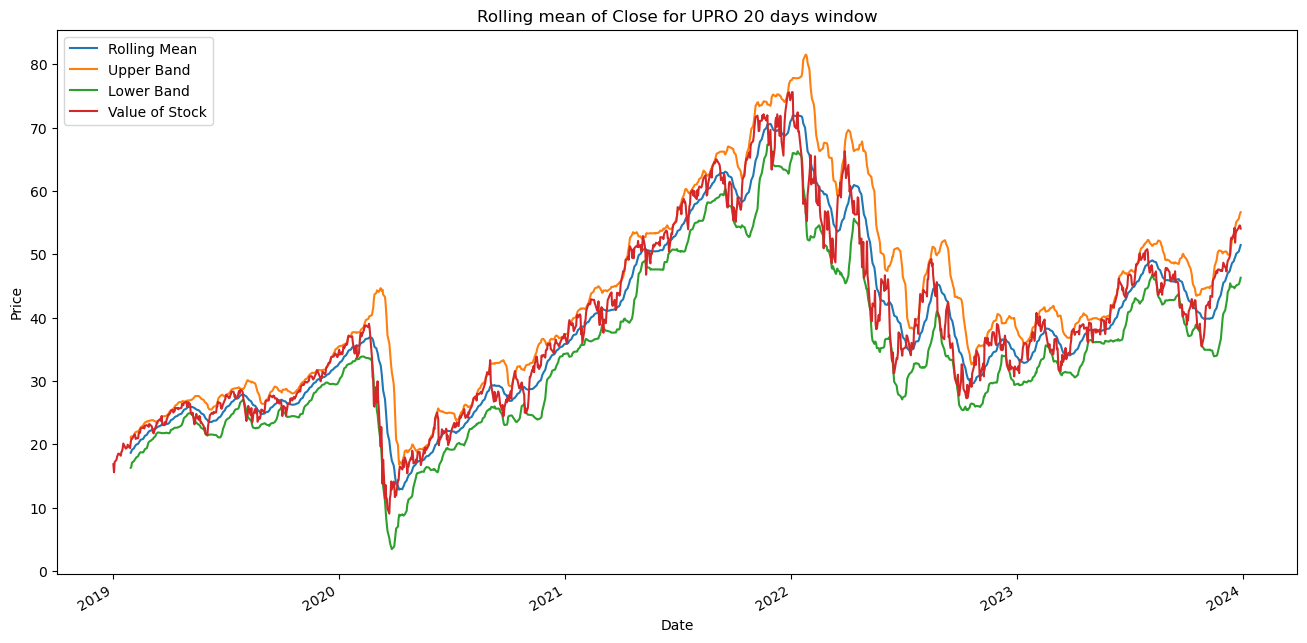

In [35]:
# view rolling statistics for UPRO
stocks = 'UPRO'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


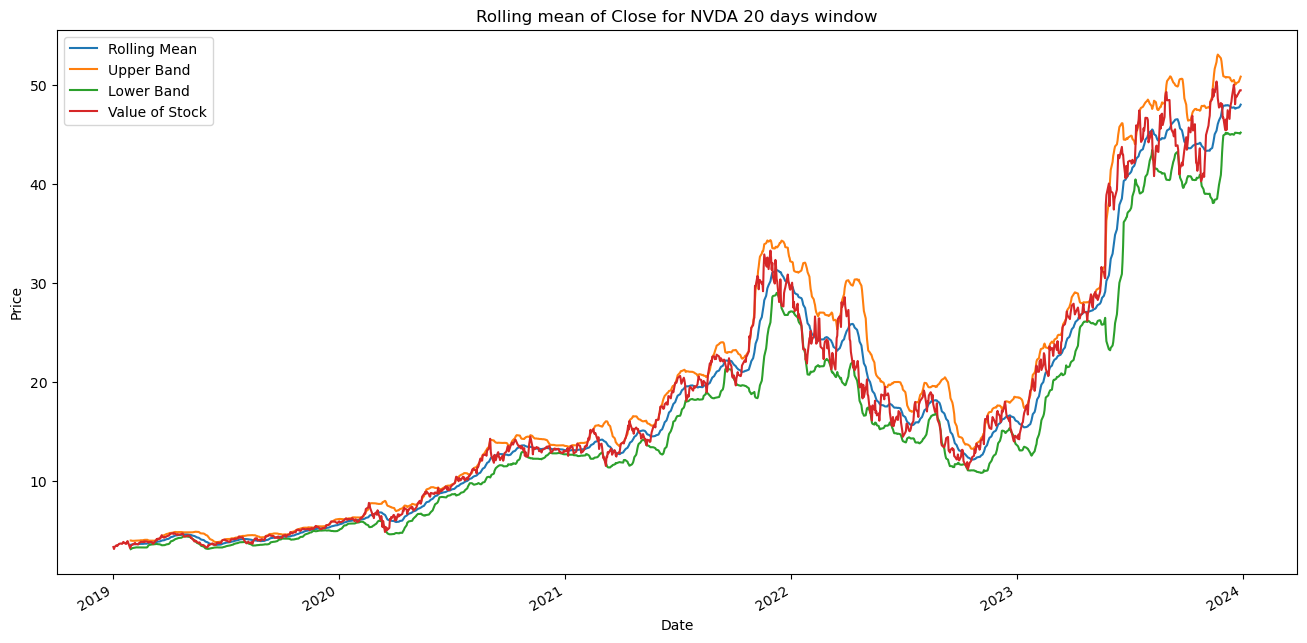

In [36]:
# view rolling statistics for NVDIA
stocks = 'NVDA'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


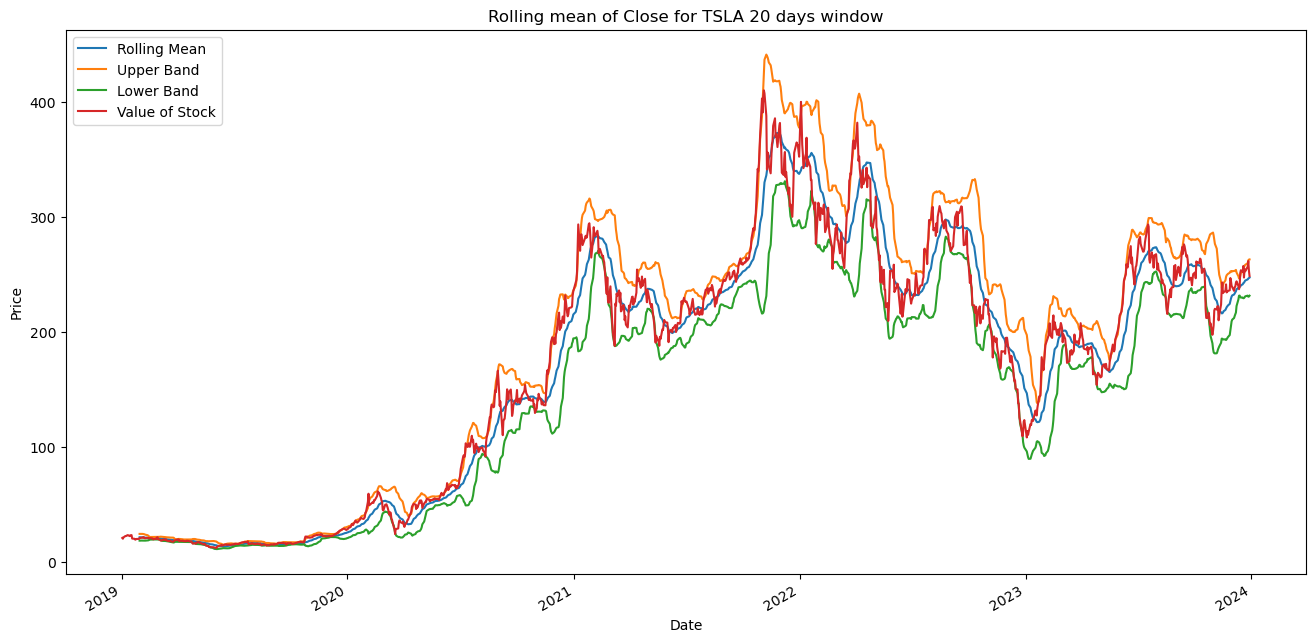

In [37]:
# view rolling statistics for Tesla
stocks = 'TSLA'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

/tmp/ipykernel_11705/3921470488.py:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(upper_band, label = 'Upper Band')


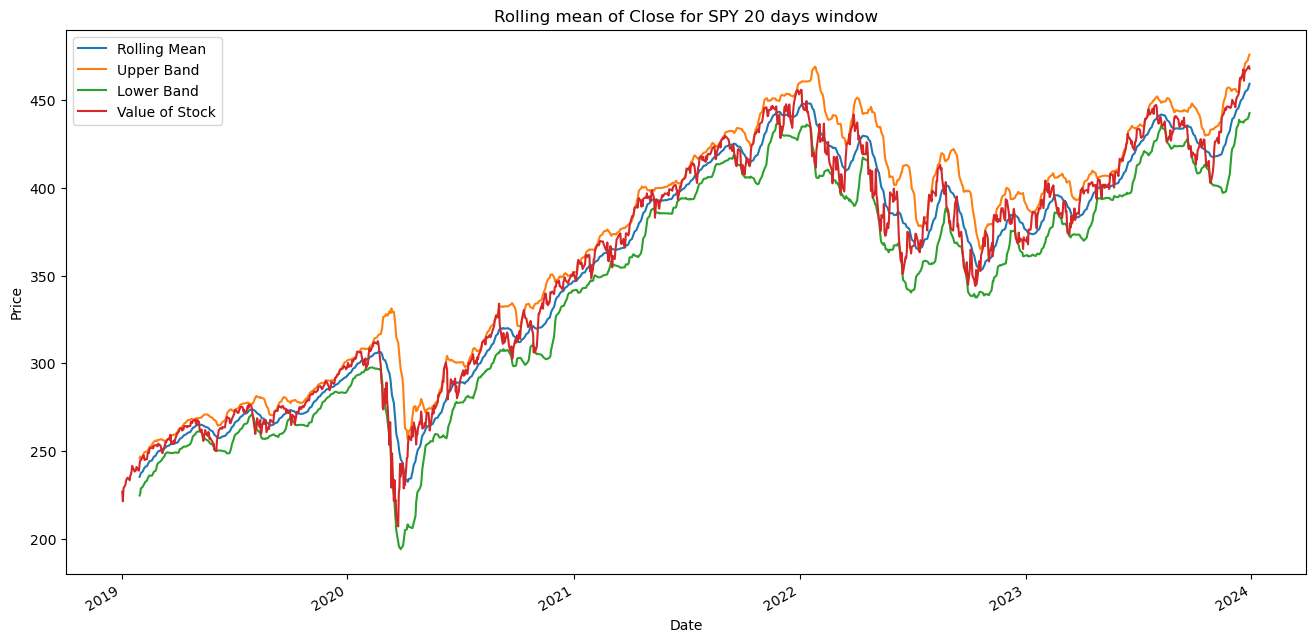

In [38]:
# view rolling statistics for SPY
stocks = 'SPY'
type_ = 'Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2023-12-31'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

From the above plots, we can see that the initial values for the rolling mean are missing. This is as a result of the 20 days window period we used at the beginning which had no values. We can also observe that the rolling mean follows the movement of the raw stock prices and it is less spiky. We can also see that UPRO has lower stock prices than Microsoft and Apple in 2020. In this data exploration session, I only considered a 20 days window and for 2 standard deviation away from the mean for simplicity. You may want to try computing different windows sizes and standard deviations to see how differently the stock prices behave.

### Computing Daily Returns
Daily returns tells us how much the stock price go up and down on a particular day. We can compute using the following function
 
where price(t) is the price of today's stock and price(t-1) is the price of yesterday's stock.

In [39]:
def daily_returns_cal(df,stocks):
    """
    This function computes and returns the daily return values
    input: df (dataframe) and stocks
    output: daily return values
    """
    
    daily_returns = (df[('Close', stocks)][1:]/df[('Close', stocks)][:-1].values) - 1
       
    return daily_returns


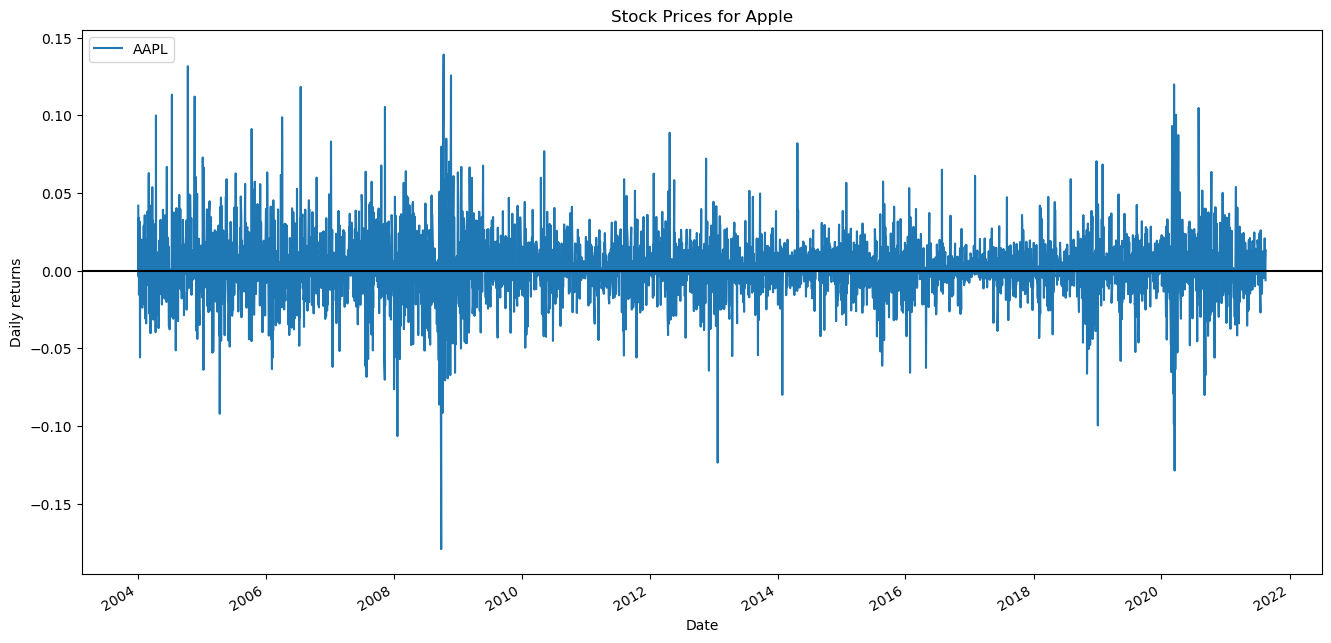

In [40]:
# Daily return of Microsoft
plot_data2(daily_returns_cal(fin_data,'AAPL'),stocks=['AAPL'], ylabel = 'Daily returns',title='Stock Prices for Apple',y=0)


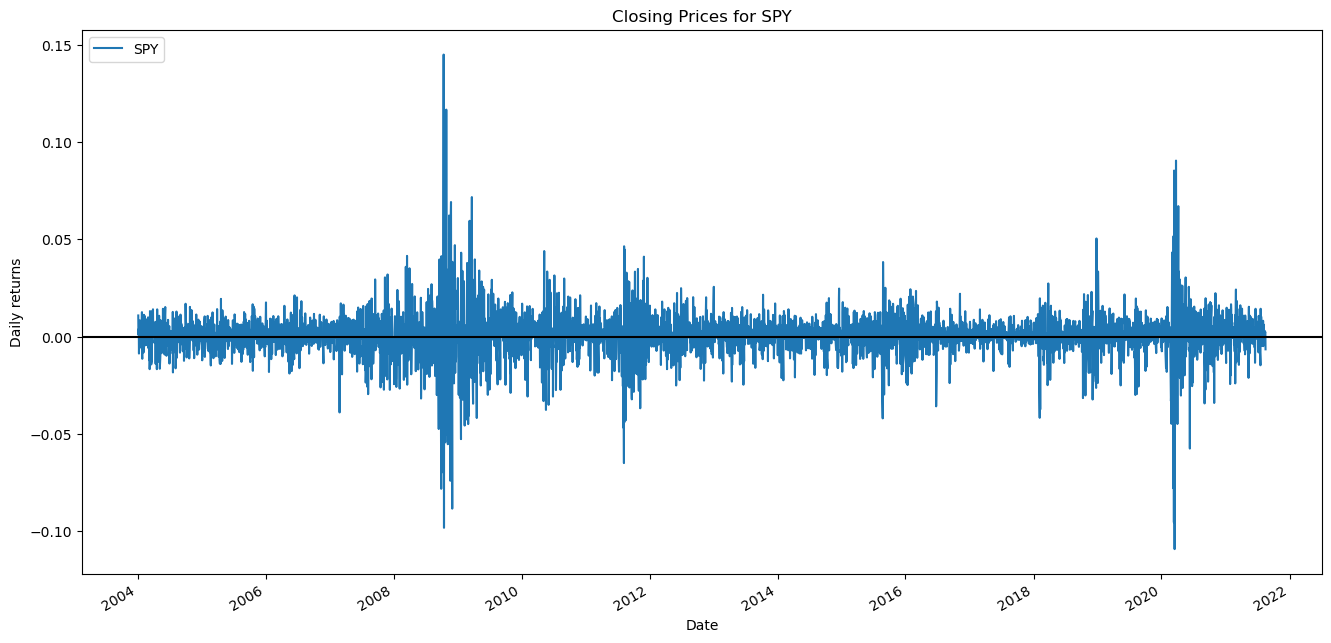

In [41]:
# Daily return of SPY
plot_data2(daily_returns_cal(fin_data,'SPY'),stocks=['SPY'], ylabel = 'Daily returns',title='Closing Prices for SPY',y=0)

From the above plots, we can see that the volatility range for SPY is higher than Apple. This could be as a result of technology companies like Apple bouncing back faster during the pandemic.

# 3. Modelling
In this section, I will be trying out some models to predict the closing price of a stock.

## Predicting the Close value of Apple stocks

In [42]:
# Function that get specific stock data and fills in any missing value
def get_data(df, stocks):
    """
    This function gets a specific stock data and fills in any missing values using the fill forward and fill backward methods
    Input: 
    df - dataframe
    stocks - the type of stock
    Output - a cleaned dataset to be used for prediction
    """
    df1 = pd.DataFrame (data = df.iloc[:, df.columns.get_level_values(1)==stocks].values,
                          index = df.iloc[:, df.columns.get_level_values(1)==stocks].index,
                          columns = df.iloc[:, df.columns.get_level_values(1)==stocks].columns.get_level_values(0))
    
    df1.fillna(method='ffill', inplace= True)
    df1.fillna(method='bfill', inplace=True)
    
    return df1

In [43]:
# get Apple data and view the first 5 rows
aapl_data = get_data(fin_data, 'AAPL')  
aapl_data.head()

Price          Close      High       Low      Open       Volume
Date                                                           
2004-01-02  0.320196  0.327268  0.318691  0.324258  144642400.0
2004-01-05  0.333588  0.336897  0.322302  0.322302  395018400.0
2004-01-06  0.332384  0.337349  0.326666  0.334791  509348000.0
2004-01-07  0.339907  0.343519  0.329976  0.332534  586874400.0
2004-01-08  0.351493  0.357060  0.340810  0.343669  460303200.0

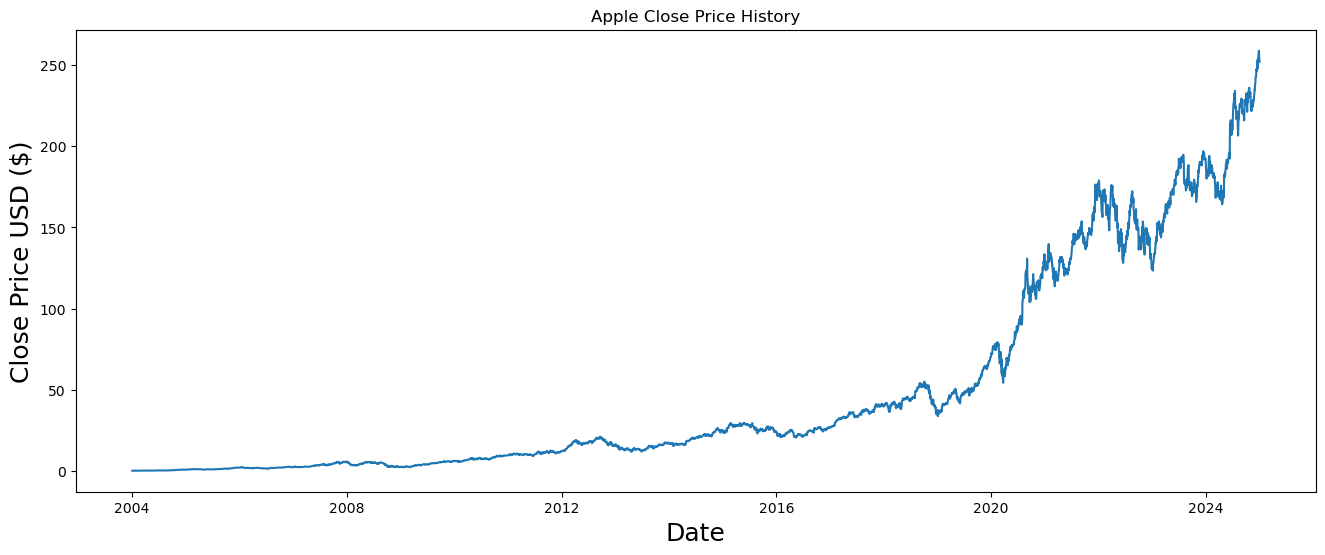

In [44]:

# plot showing Apple historical closing prices
plt.figure(figsize=(16,6))
plt.title('Apple Close Price History')
plt.plot(aapl_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


### Prediction using Long Short-Term Memory LSTM
LSTM is an artificial recurrent neural network (RNN) architecture used in deep learning that is capable of learning long-term dependencies. It processes data passing on information as it propagates forward and have a chain like structure.

In [45]:
#view the shape
aapl_data.shape


(5284, 5)

In [46]:
# create the variables for prediction and split into training and test sets

y = np.log(aapl_data['Close']) # we want to predict the close price
X = aapl_data.drop('Close', axis=1) # predictive variables (removing close from it)

#split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)



In [47]:
# Build the LSTM model for Apple stock
model = Sequential()
model.add(Input(shape=(xtrain.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


2025-05-03 23:29:23.208632: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [48]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [50]:
print(np.array(xtrain).shape)

(4227, 4)


### Initial parameter used for LSTM

In [51]:
# Train the model - part 1

xtrain = np.array(xtrain)
xtrain_reshaped = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

model.fit(xtrain_reshaped, ytrain, batch_size=1, epochs=5, verbose=0)

In [52]:
# predictions 
xtest = np.array(xtest)
xtest_reshaped = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))
predictions = model.predict(xtest_reshaped)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [53]:
# calculation of the mean absolute error
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

0.031136910194860788

In [54]:
# Train the model - part 2
xtrain = np.array(xtrain)
xtrain_reshaped = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

model.fit(xtrain_reshaped, ytrain, batch_size=100, epochs=10, verbose=0)

In [55]:
#predictions 2
xtest = np.array(xtest)
xtest_reshaped = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))
predictions = model.predict(xtest_reshaped)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [56]:
#calculation of the mean absolute error 2
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3


0.008881461502392846

### Refinement LSTM
#### Final Parameters used to tune LSTM

In [57]:
# Build the LSTM model with the relu activation function
model2 = Sequential()
model2.add(Input(shape=(xtrain.shape[1], 1)))
model2.add(LSTM(128, activation='relu', return_sequences=True))
model2.add(LSTM(64, activation='relu', return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [58]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
# view model2 summary
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model - part 3
xtrain = np.array(xtrain)
xtrain_reshaped = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

model2.fit(xtrain_reshaped, ytrain, batch_size =1, epochs=5, verbose=0)

In [61]:
#predictions 3
xtest = np.array(xtest)
xtest_reshaped = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

predictions2 = model2.predict(xtest_reshaped)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [62]:
#calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions2)
mean_abs_error2

0.08289665256198359

In [63]:
# Train the model - part 4 (increasing no. of epochs and batch_size)
xtrain = np.array(xtrain)
xtrain_reshaped = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

model2.fit(xtrain_reshaped, ytrain, batch_size =100, epochs=10, verbose=0)

In [64]:
#predictions 3
xtest = np.array(xtest)
xtest_reshaped = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

predictions2 = model2.predict(xtest_reshaped)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [65]:
#calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions2)
mean_abs_error2

0.06663359876507516

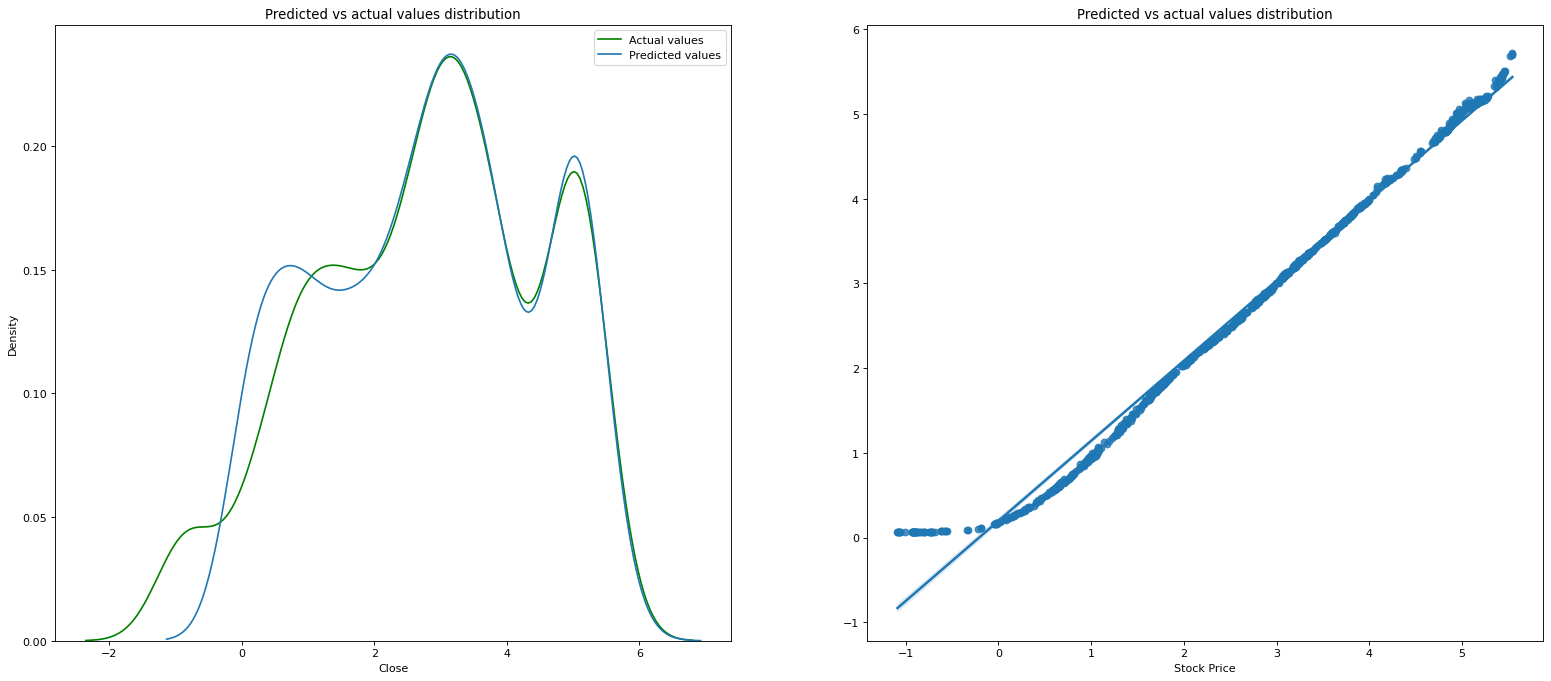

Mean absolute error of <Sequential name=sequential, built=True>: 0.008881461502392846


In [66]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predictions2, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=ytest, y=predictions2)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model,mean_abs_error3))


In [67]:
# Train the model part 5 (no activation function)
xtrain = np.array(xtrain)
xtrain_reshaped = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

model.fit(xtrain_reshaped, ytrain, batch_size =800, epochs=50, verbose=0)

In [68]:
#predictions 
xtest = np.array(xtest)
xtest_reshaped = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

predictions = model.predict(xtest_reshaped)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [69]:

#calculation of the mean absolute error
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3


0.013891944974066638

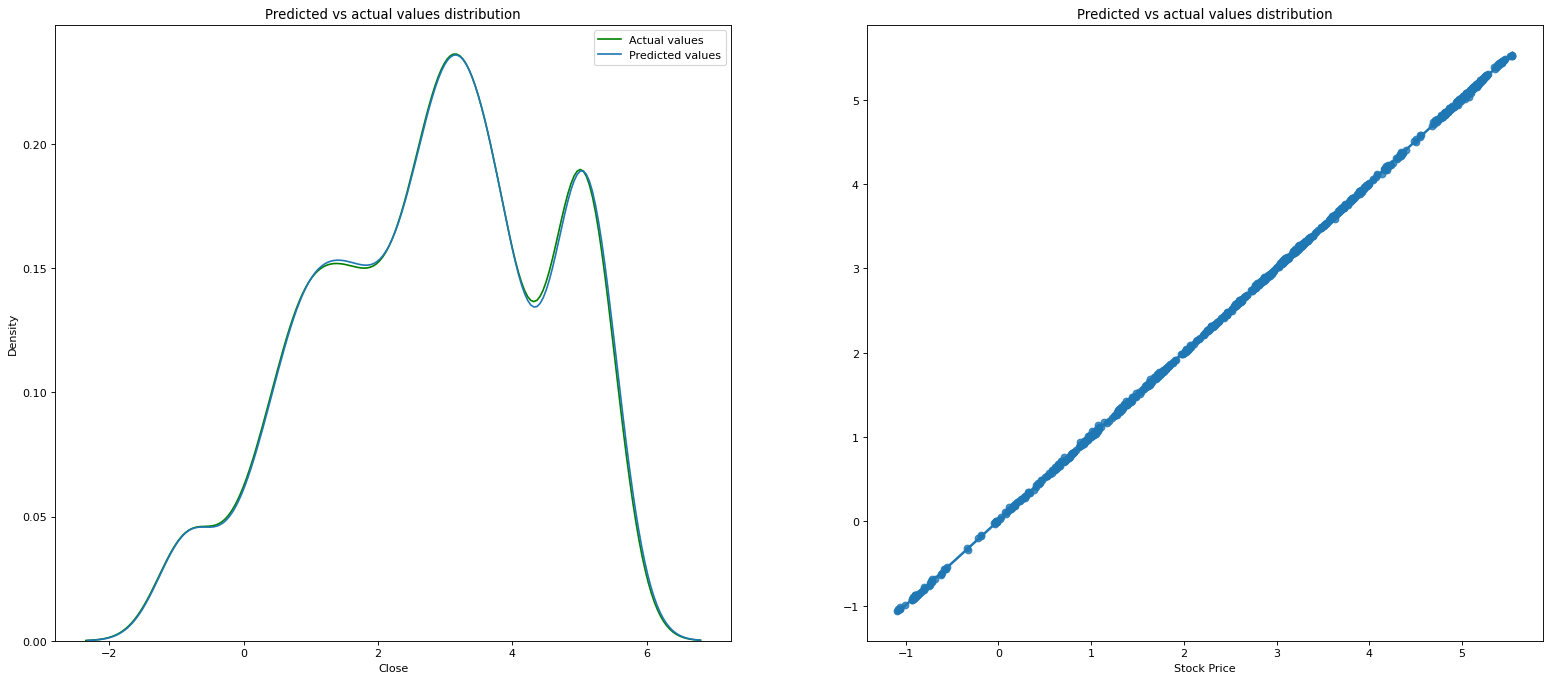

Mean absolute error of <Sequential name=sequential, built=True>: 0.013891944974066638


In [70]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predictions, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=ytest, y=predictions)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model,mean_abs_error3))

From the above, we can see that the model is trained and evaluated using LSTM. The predicted and actual adjustable stock prices plots look are relatively similar with a mean absolute error of 0.0087 which isn't bad.

### Prediction using Linear Regression

In [71]:
#view the shape
aapl_data.tail()

Price            Close        High         Low        Open      Volume
Date                                                                  
2024-12-23  254.989655  255.369227  253.171646  254.490204  40858800.0
2024-12-24  257.916443  257.926411  255.009620  255.209412  23234700.0
2024-12-26  258.735504  259.814335  257.347047  257.906429  27237100.0
2024-12-27  255.309296  258.415896  252.782075  257.546826  42355300.0
2024-12-30  251.923019  253.221595  250.474615  251.952985  35557500.0

In [72]:
# Building the model for Adj close prediction

y = np.log(aapl_data['Close']) # we want to predict the close price
X = aapl_data.drop('Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4227, 4)
y_train (4227,)
x_test (1057, 4)
y_test (1057,)


In [73]:
#creating an instance of a Linear Regressor 
model_lin = LinearRegression()

#fit the model
model_lin.fit(X_train,y_train)

LinearRegression()

In [74]:
# check the score, coef_ and intercept_ of the model
model_lin.score(X_train,y_train)
model_lin.coef_
model_lin.intercept_

print('The score of the model is {}, the coeficients  are {} and the intercept is {}'.format(model_lin.score(X_train,y_train),model_lin.coef_,model_lin.intercept_))

The score of the model is 0.7393438507006508, the coeficients  are [ 8.96245692e-02 -8.61167131e-02  1.19903899e-02 -1.29609404e-09] and the intercept is 2.5310926576886055


In [75]:
#prediction
predict = model_lin.predict(X_test)
predict

array([2.50261918, 2.76410823, 1.71048958, ..., 2.81214488, 1.8952099 ,
       2.4384444 ])

In [76]:
#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.6466038682644017

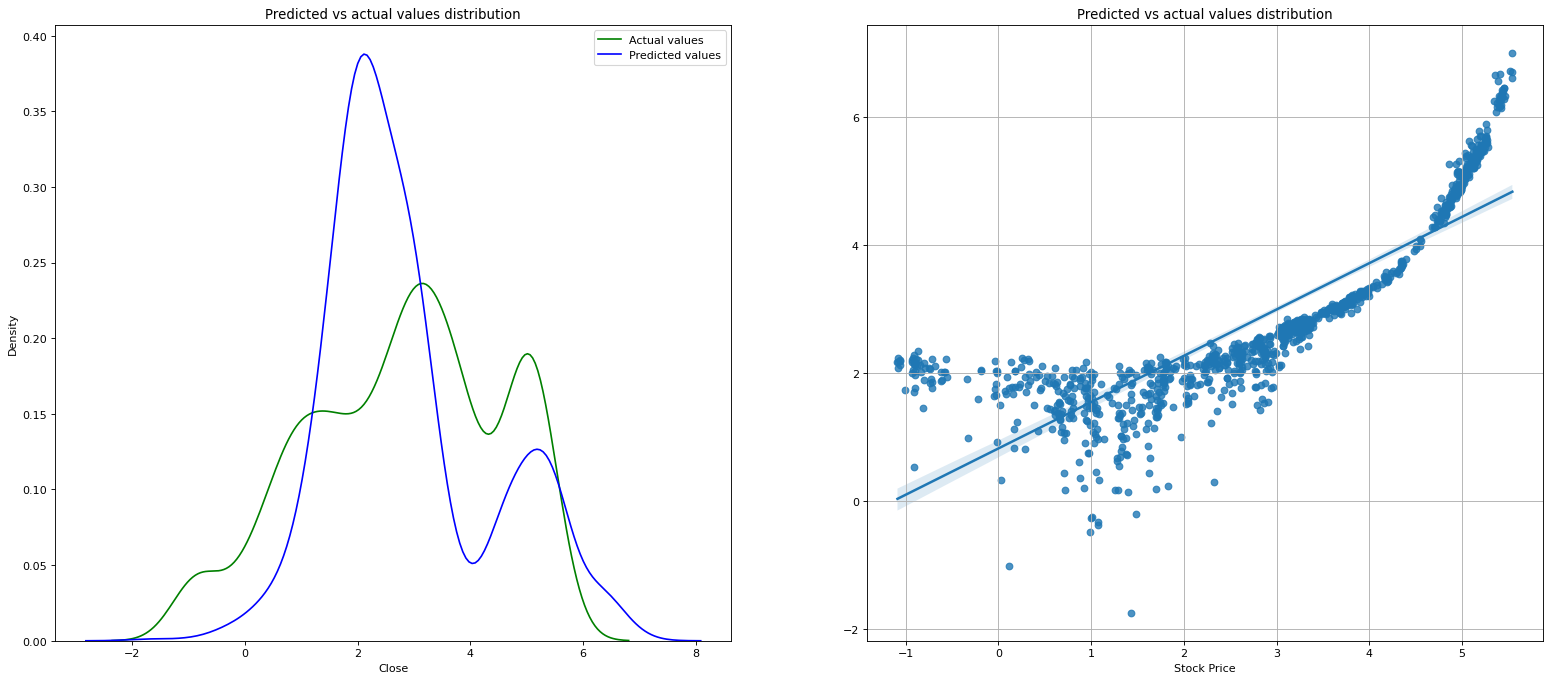

Mean absolute error of LinearRegression(): 0.6466038682644017


In [77]:
# plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
plt.grid(True)
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_lin,mean_abs_error))

From the above, we can see that the model is trained and evaluated using LinearRegression. The predicted and actual adjustable stock prices plots have variations but with a mean absolute error is *0.646* which is worst than the LSTM model. However, there is still room for improvement and trying out other models to compare. Let't try out another model and see how it performs.

### Prediction using Random Forest Regressor

In [78]:
# Building the model for Adj close prediction
y = np.log(aapl_data['Close']) # we want to predict the adjusted close price
X = aapl_data.drop('Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (4227, 4)
y_train (4227,)
x_test (1057, 4)
y_test (1057,)


In [79]:
#creating an instance of a Random Forest Regressor 
model_rf = RandomForestRegressor(n_estimators=100, random_state=47)

In [80]:
#fit the model with the training data
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=47)

In [81]:
#prediction
predict = model_rf.predict(X_test)
predict #view some predictions

array([2.80118544, 3.13438721, 0.29114189, ..., 3.23196587, 1.76854803,
       2.66010197])

In [82]:
#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error



0.0075555704047116255

In [83]:
display_ = pd.DataFrame({'Actual value': y_test, 'Predicted value':predict})
display_.head(10)



Actual value  Predicted value
Date                                     
2014-04-10      2.796676         2.801185
2016-07-20      3.130092         3.134387
2005-02-28      0.300104         0.291142
2006-12-26      0.897283         0.905559
2021-11-22      5.064182         5.078808
2010-11-01      2.214177         2.207760
2013-01-28      2.614269         2.602410
2008-05-02      1.694723         1.699796
2019-10-15      4.039562         4.049331
2004-01-14     -1.010237        -1.014985

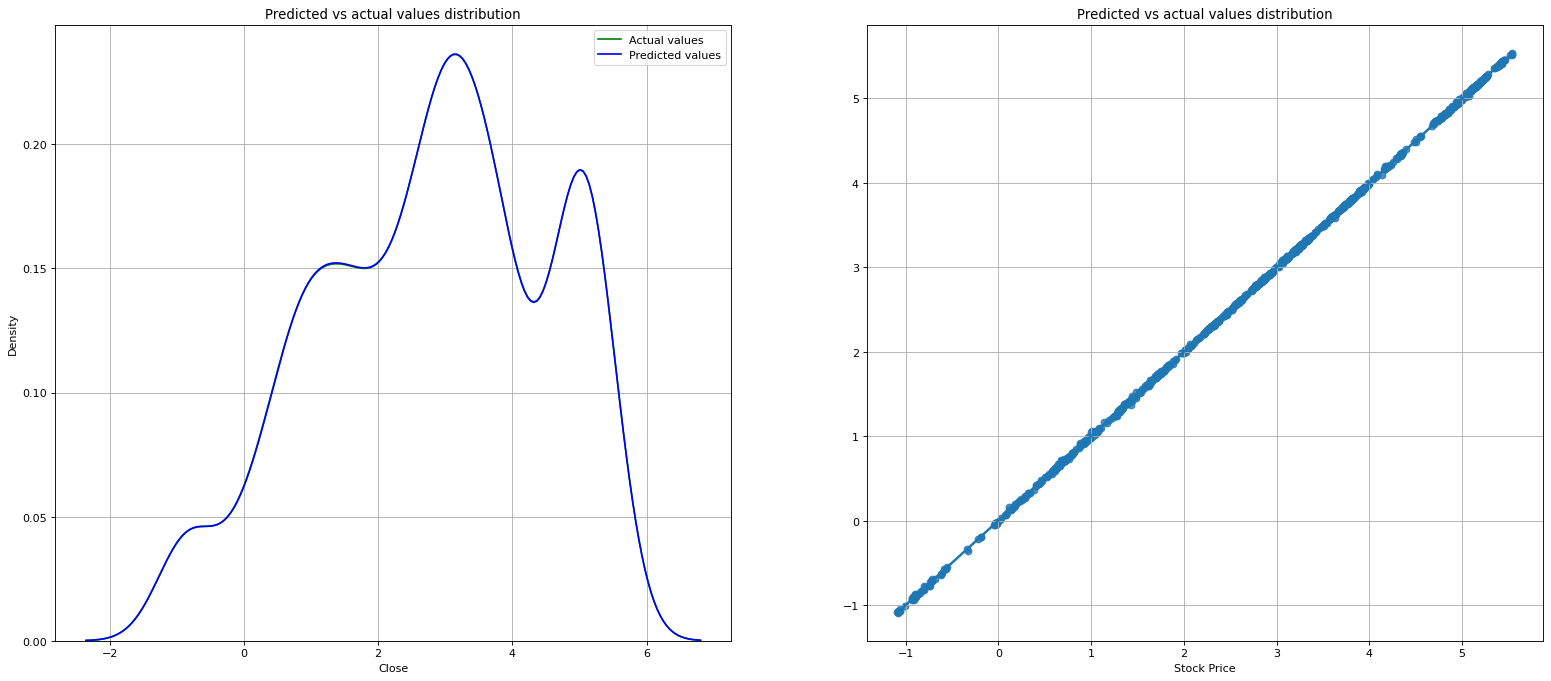

Mean absolute error of RandomForestRegressor(random_state=47): 0.0075555704047116255


In [84]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
ax1.legend()
ax1.grid(True)
plt.grid(True)
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf,mean_abs_error))

From the above, we can see that the model is trained and evaluated using RandomForestRegressor. The predicted and actual stock prices plots look are relatively similar with a mean absolute error is 0.0075 which is good. Let us see how our three models would perfom with the SPY.

#### Predicting Close Value of SPY


In [85]:
# get SPY data and view the first 5 rows
spy_data = get_data(fin_data, 'SPY')  
spy_data.head()

Price           Close       High        Low       Open      Volume
Date                                                              
2004-01-02  74.680298  75.324845  74.344596  75.022710  38072300.0
2004-01-05  75.492683  75.546392  74.921986  74.989130  27959800.0
2004-01-06  75.566528  75.687381  75.197254  75.304681  20472800.0
2004-01-07  75.821655  75.908936  75.123394  75.459096  30170400.0
2004-01-08  76.123795  76.143941  75.714238  76.036514  36438400.0

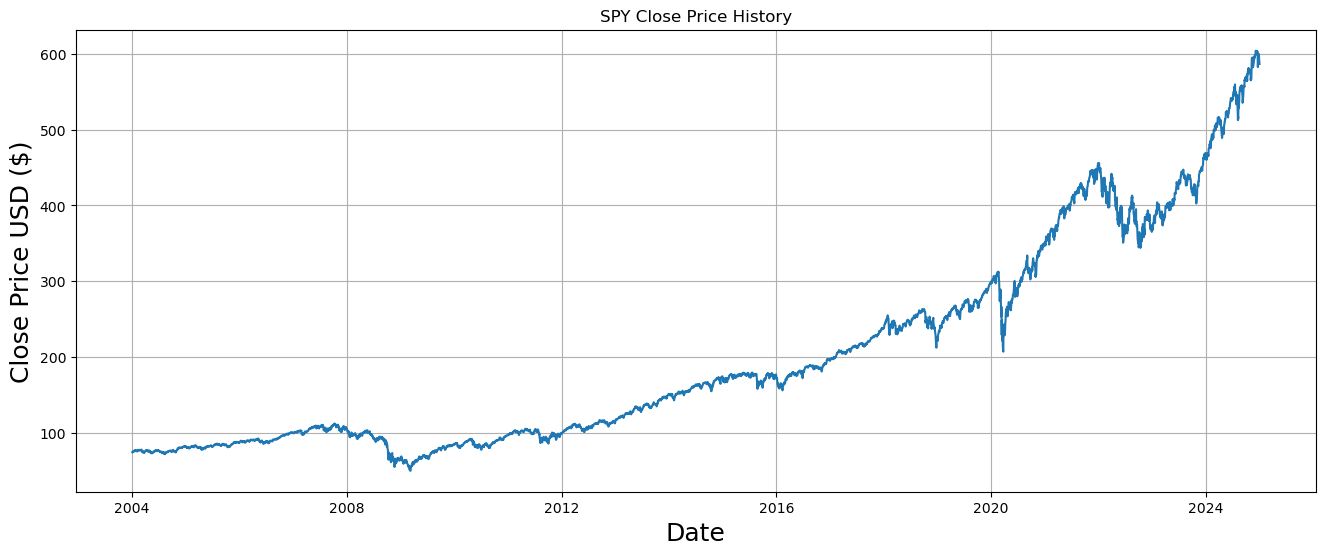

In [86]:
# plot showing SPY historical closing prices
plt.figure(figsize=(16,6))
plt.title('SPY Close Price History')
plt.plot(spy_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.grid(True)
plt.show()

In [87]:
# Building the model for close prediction
# create the variables for prediction and split into training and test sets
y = np.log(spy_data['Close']) # we want to predict the adjusted close price
X = spy_data.drop('Close', axis=1)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (4227, 4)
y_train (4227,)
x_test (1057, 4)
y_test (1057,)


#### Predicting using LSTM

In [93]:
#### LSTM Model for SPY stocks
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model part 5 (no activation function)
X_train = np.array(X_train)
xtrain_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
model_lstm = model.fit(xtrain_reshaped, y_train, batch_size =800, epochs=50, verbose=0)

#predictions 
X_test = np.array(X_test)
xtest_reshaped = xtest.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(xtest_reshaped)

#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predictions)
mean_abs_error

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


1.5301455684112568

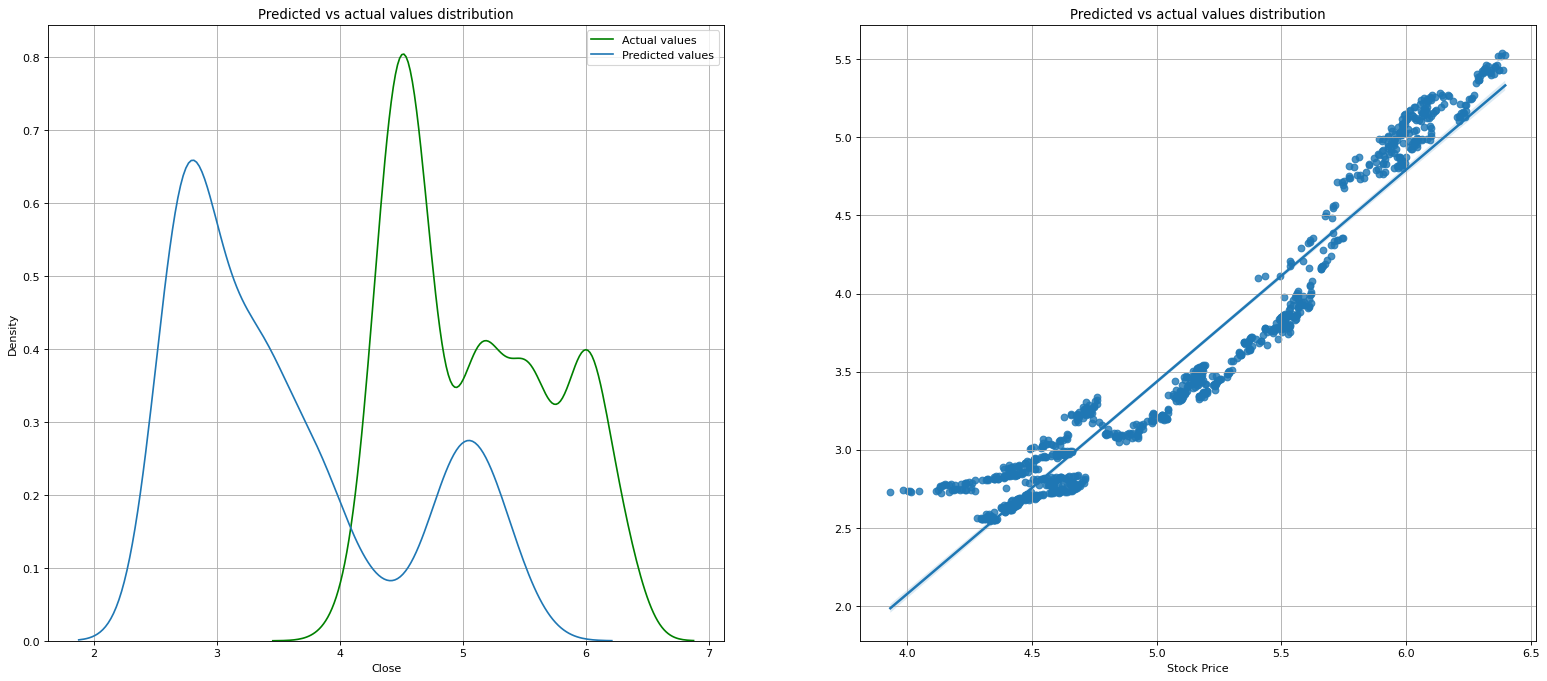

Mean absolute error of <keras.src.callbacks.history.History object at 0x7f8dc41342b0>: 1.5301455684112568


In [94]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predictions, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predictions)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
plt.grid()
ax1.grid(True)
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_lstm,mean_abs_error))

#### Prediction Using Linear Regression

In [89]:
#creating an instance of a Linear Regressor 
model_lin2 = LinearRegression()

#fit the model
model_lin2.fit(X_train,y_train)

#prediction
predict = model_lin2.predict(X_test)

#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error


0.1326806395990032

#### Prediction Using Random Forest Regressor

In [90]:
# creating an instance of a Random Forest Regressor 
model_rf2 = RandomForestRegressor(n_estimators=100, random_state=47)

#fit the model with the training data
model_rf2.fit(X_train,y_train)

#prediction
predict2 = model_rf2.predict(X_test)
predict2 #view some predictions

#calculation of the mean absolute error
mean_abs_error2 = mean_absolute_error(y_test, predict2)
mean_abs_error2

0.003827820979671786

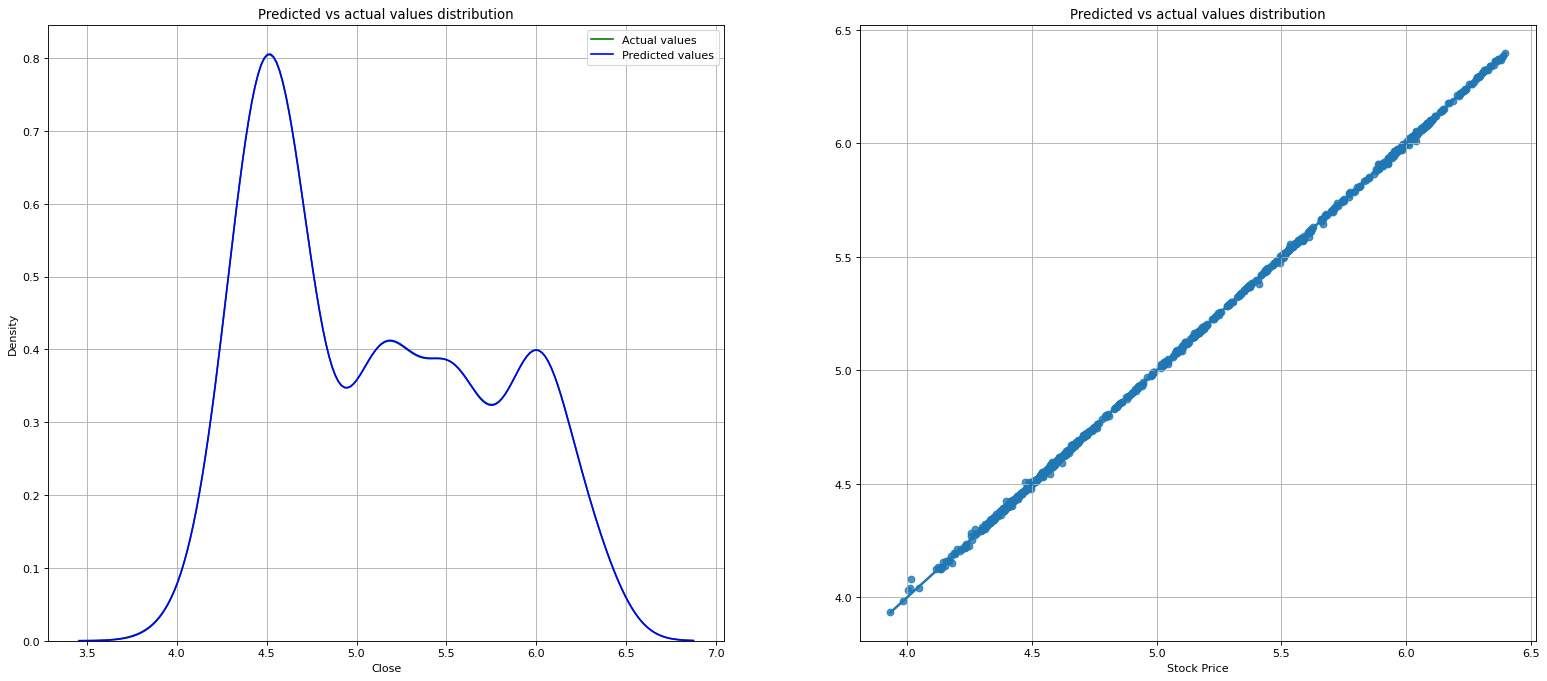

Mean absolute error of RandomForestRegressor(random_state=47): 0.003827820979671786


In [91]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict2, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict2)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
plt.grid()
ax1.grid(True)
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf2,mean_abs_error2))

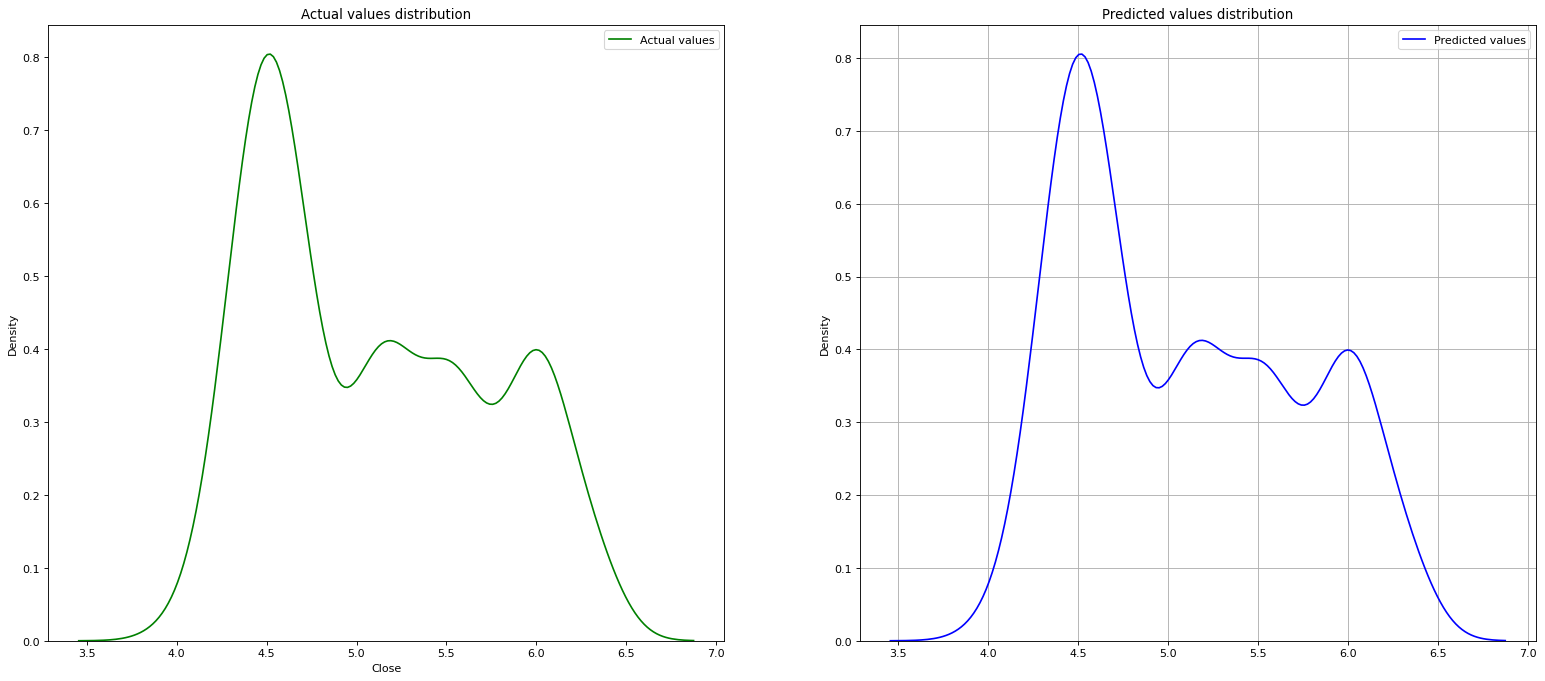

Mean absolute error of RandomForestRegressor(random_state=47): 0.003827820979671786


In [92]:
#plot showing the prediction and actual values
fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Actual values distribution')
axs[1].set_title('Predicted values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict2, color="b", label='Predicted values', ax=axs[1])

ax1.legend()
ax2.legend()
plt.grid()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf2,mean_abs_error2))

From the above, we can see that the model is trained and evaluated using RandomForestRegressor. The predicted and actual SPY prices plots are very similar with a mean absolute error is 0.0038 which is very good. We can also see that all three models perform better with SPY than Apple stocks.

## 4. Results
### Evaluation and Validation of models
From my investigation of three different models, I observed that RandomForestRegressor delivered a much lower mean absolute error **(0.00755, 0.0038)** than the LSTM **(0.0087, 1.530)** or LinearRegression **(0.646, 0.132)** for Apple and SPY respectively. I also observed that tuning the parameters for LSTM (e.g the number of epochs and batch_size) resulted in better prediction.

### Interesting facts about the project
When exploring the data, it was interesting to see how the stock prices of different companies changed due to the pandemic and how the technological companies stock prices bounced back more quickly than the other companies considered. It was also interesting to see how Pfizer stocks improved as the vaccine rollout began.

Here are some major highlights from the data exploration section:

From the above plots, let's take note of the following:

- 2019: Before the pandemic, we notice that most of the companies stocks were doing relatively well with Apple and UPRO taking the lead and Amazon and Tesla trailing behind.
- 2020: On the onset of the pandemic around Spring, we notice that there was a fall in stock prices for all the companies, but afterwards the technology companies like Amazon, Apple, NVDIA, Tesla and Microsoft started to grow again. But UPRO and VOO had a steady growth. Tesla stocks took off and had the greatest return!
- 2021: Overall there was an improvement in the stock prices of all the companies we considered.
- 2022: Rising inflation, increased interest rates, and the Russia-Ukraine war had a negative impact on the market. Tesla was hit the hardest.
- 2023: There was an overall improvement compared to last year. NVDIA and Tesla grew exponentially.
### Difficulties encountered
The Machine Learning for Trading project really helped me understand market. I learned so much. I spent some time watching courses from Khan Academy to understand the basic concepts of the Stock Market. I was able to learn to perform EDA with financial datasets. An additional practice to choosing the right model to predict the stock values.
In the modelling part (particularly the LSTM), one would have to spend some time tuning the parameters and training it to get the best results.
### Improvements
An improvement to my analysis could be the following:
Take some significant time to tune the model parameters as well as include more features that might be relevant for stock price prediction.
Try out more models and see if there might be one with a better performance than the **RandomForestRegressor**. I only tried three models for simplicity and time constraints.
Explore other companies stocks to see how well one can predict their stocks prices with different models.